In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset for San Fransisco for the year of 2022
data = pd.read_csv('SFData.csv')
data

Year  Month  Day  Hour  Minute  Temperature  Alpha    AOD  Asymmetry  \
0      2022      1    1     0       0          9.7   0.64  0.038       0.67   
1      2022      1    1     0      30          8.9   0.64  0.038       0.67   
2      2022      1    1     1       0          8.2   0.64  0.035       0.67   
3      2022      1    1     1      30          7.9   0.64  0.035       0.67   
4      2022      1    1     2       0          7.7   0.66  0.032       0.67   
...     ...    ...  ...   ...     ...          ...    ...    ...        ...   
17515  2022     12   31    21      30         13.1   0.99  0.052       0.65   
17516  2022     12   31    22       0         12.9   1.12  0.051       0.65   
17517  2022     12   31    22      30         12.6   1.12  0.051       0.65   
17518  2022     12   31    23       0         12.3   1.22  0.040       0.65   
17519  2022     12   31    23      30         12.3   1.22  0.040       0.65   

       Clearsky DHI  ...  GHI  Ozone  Relative Humidity  Solar Zenith Angle  \
0                27  ...  112  0.278              78.87               80.74   
1                28  ...   57  0.280              83.22               85.43   
2                 6  ...    6  0.281              85.07               90.07   
3                 0  ...    0  0.282              86.82               95.95   
4                 0  ...    0  0.283              89.07              101.43   
...             ...  ...  ...    ...                ...                 ...   
17515            72  ...   36  0.292              93.75               63.44   
17516            68  ...   29  0.294              90.18               65.80   
17517            63  ...   24  0.295              92.06               68.79   
17518            55  ...   26  0.297              86.86               72.34   
17519            49  ...    5  0.297              86.86               76.36   

        SSA  Surface Albedo  Pressure  Precipitable Water  Wind Direction  \
0      0.94            0.12      1012                 1.1             322   
1      0.94            0.12      1012                 1.0             323   
2      0.94            0.12      1013                 1.0             324   
3      0.94            0.12      1013                 1.0             325   
4      0.94            0.12      1013                 1.0             326   
...     ...             ...       ...                 ...             ...   
17515  0.95            0.13      1001                 2.7               5   
17516  0.95            0.13      1000                 2.6               4   
17517  0.94            0.13      1001                 2.5             182   
17518  0.93            0.13      1001                 2.4             359   
17519  0.93            0.13      1001                 2.4             359   

       Wind Speed  
0             3.5  
1             3.5  
2             3.5  
3             3.5  
4             3.6  
...           ...  
17515         4.3  
17516         4.8  
17517         5.5  
17518         6.1  
17519         6.1  

[17520 rows x 28 columns]

count    17520.000000
mean       223.097489
std        304.370089
min          0.000000
25%          0.000000
50%          8.500000
75%        426.000000
max       1044.000000
Name: GHI, dtype: float64


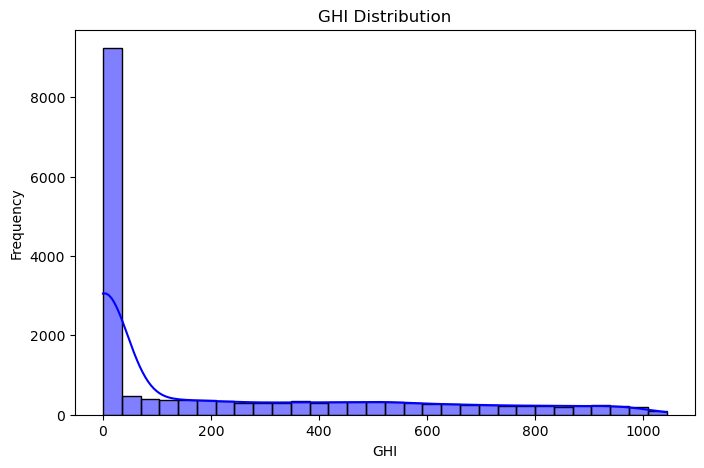

In [22]:
# Statistical summary of DHI
print(data['GHI'].describe())

# Visualize the DHI distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(data['GHI'], kde=True, bins=30, color='blue')
plt.title('GHI Distribution')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.show()


GHI                   1.000000
Clearsky GHI          0.968311
DNI                   0.897737
Clearsky DHI          0.891225
Clearsky DNI          0.880554
Temperature           0.695790
DHI                   0.671054
Hour                  0.644963
Wind Speed            0.198609
AOD                   0.117511
Ozone                 0.113310
Wind Direction        0.055677
Day                   0.008911
Surface Albedo        0.002779
Precipitable Water    0.002015
Minute                0.000457
Cloud Fill Flag      -0.007500
SSA                  -0.008283
Alpha                -0.046725
Month                -0.054043
Dew Point            -0.058961
Pressure             -0.066135
Asymmetry            -0.114474
Cloud Type           -0.136825
Fill Flag            -0.168492
Relative Humidity    -0.803068
Solar Zenith Angle   -0.855994
Year                       NaN
Name: GHI, dtype: float64


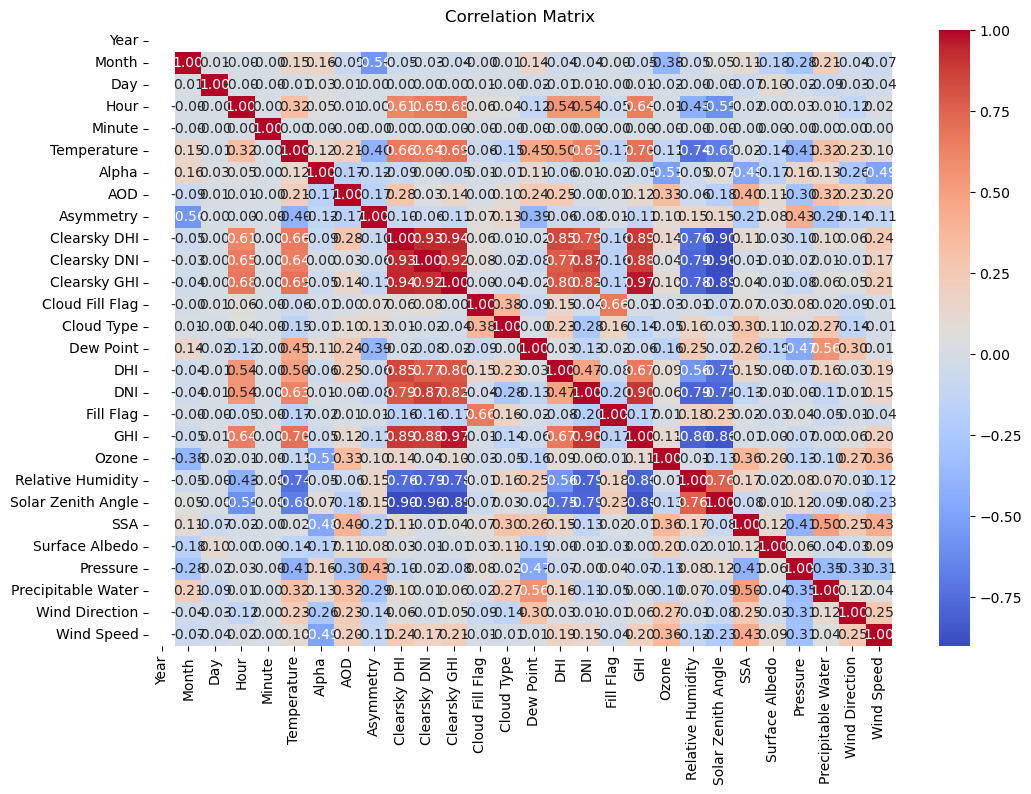

In [23]:
corr_matrix = data.corr()

# Correlation of all features with DHI
dhi_corr = corr_matrix['GHI'].sort_values(ascending=False)
print(dhi_corr)

# Heatmap for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



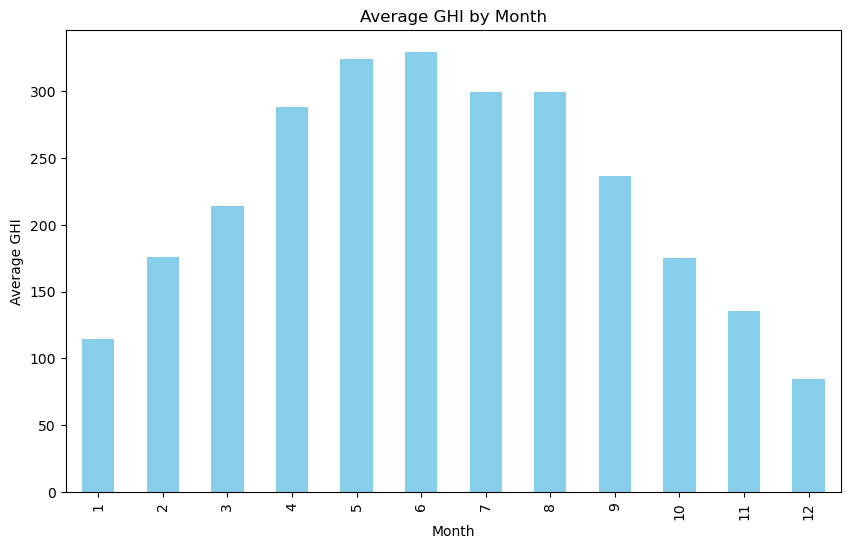

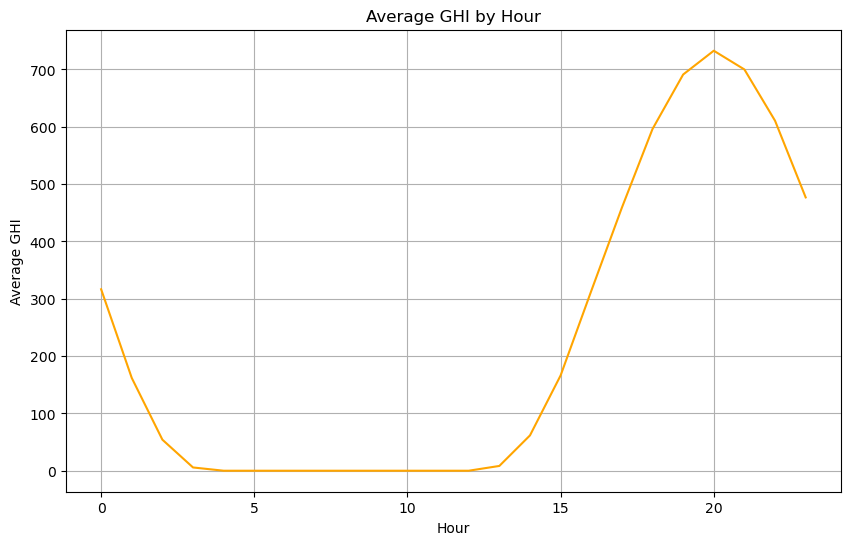

In [24]:
# Average DHI by month
monthly_avg_dhi = data.groupby('Month')['GHI'].mean()

plt.figure(figsize=(10, 6))
monthly_avg_dhi.plot(kind='bar', color='skyblue')
plt.title('Average GHI by Month')
plt.xlabel('Month')
plt.ylabel('Average GHI')
plt.show()

# Hourly average DHI
hourly_avg_dhi = data.groupby('Hour')['GHI'].mean()

plt.figure(figsize=(10, 6))
hourly_avg_dhi.plot(color='orange')
plt.title('Average GHI by Hour')
plt.xlabel('Hour')
plt.ylabel('Average GHI')
plt.grid()
plt.show()


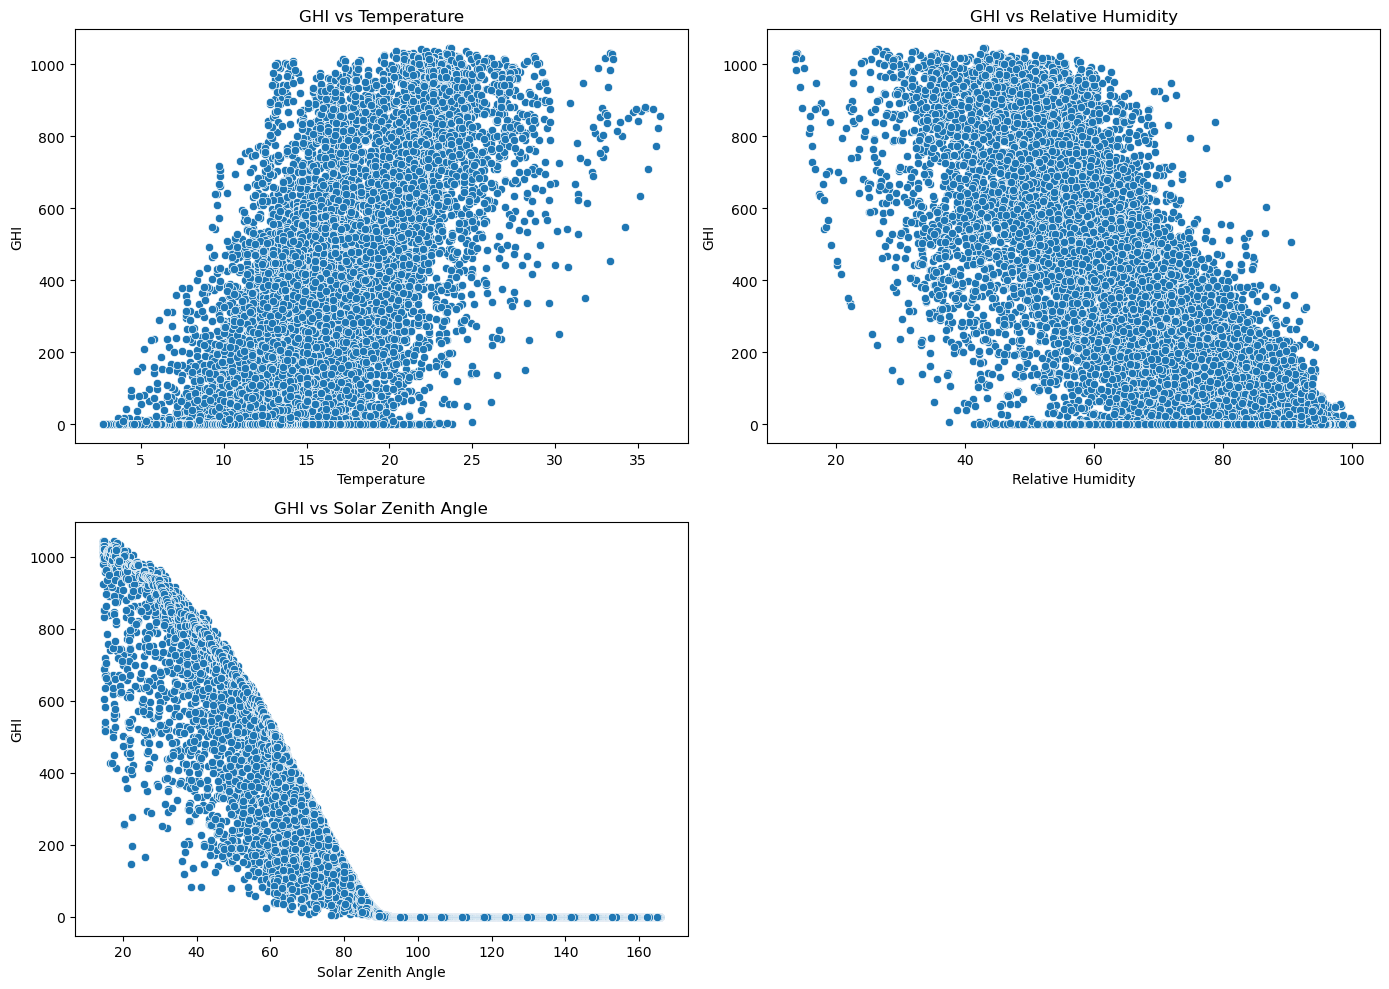

In [47]:
# Scatterplots for relationships
plt.figure(figsize=(14, 10))

# DHI vs Temperature
plt.subplot(2, 2, 1)
sns.scatterplot(x=data['Temperature'], y=data['GHI'])
plt.title('GHI vs Temperature')

# DHI vs Relative Humidity
plt.subplot(2, 2, 2)
sns.scatterplot(x=data['Relative Humidity'], y=data['GHI'])
plt.title('GHI vs Relative Humidity')

# DHI vs Solar Zenith Angle
plt.subplot(2, 2, 3)
sns.scatterplot(x=data['Solar Zenith Angle'], y=data['GHI'])
plt.title('GHI vs Solar Zenith Angle')

plt.tight_layout()
plt.show()



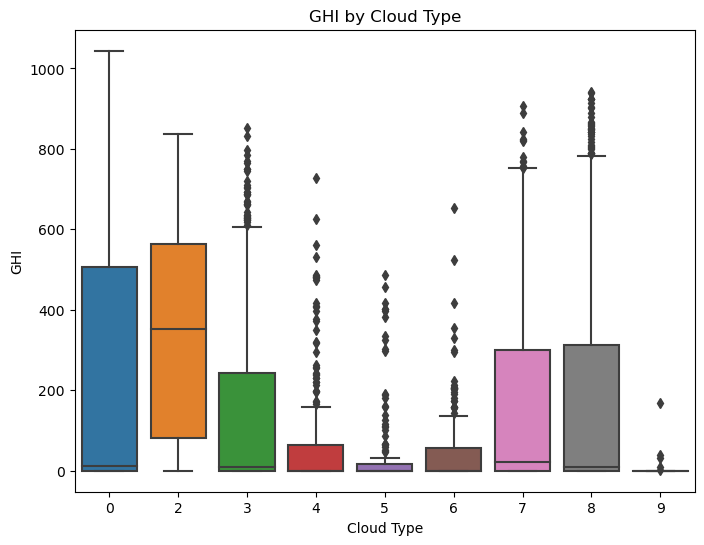

In [30]:
# Boxplot of DHI for different Cloud Types
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Cloud Type'], y=data['GHI'])
plt.title('GHI by Cloud Type')
plt.xlabel('Cloud Type')
plt.ylabel('GHI')
plt.show()


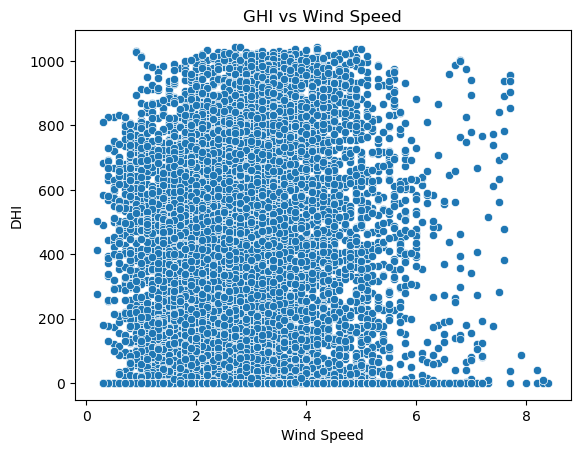

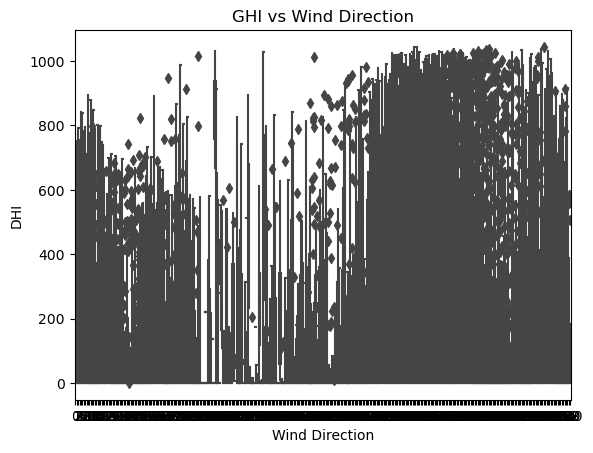

In [31]:
# Scatterplot: DHI vs Wind Speed
sns.scatterplot(x=data['Wind Speed'], y=data['GHI'])
plt.title('GHI vs Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('DHI')
plt.show()

# Wind Direction Analysis
sns.boxplot(x=data['Wind Direction'], y=data['GHI'])
plt.title('GHI vs Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('DHI')
plt.show()


In [32]:
#Data Preproccessing 
import pandas as pd

# Load data
data = pd.read_csv('SFData.csv')

# Drop all solar radiation indicators except GHI
features_to_drop = ['Clearsky GHI', 'Clearsky DHI', 'Clearsky DNI', 'DHI', 'DNI']
data = data.drop(columns=features_to_drop)



# Check dataset after modifications
print(data.head())

# Save the cleaned dataset (optional)
data.to_csv('simplified_GHI_dataset.csv', index=False)


   Year  Month  Day  Hour  Minute  Temperature  Alpha    AOD  Asymmetry  \
0  2022      1    1     0       0          9.7   0.64  0.038       0.67   
1  2022      1    1     0      30          8.9   0.64  0.038       0.67   
2  2022      1    1     1       0          8.2   0.64  0.035       0.67   
3  2022      1    1     1      30          7.9   0.64  0.035       0.67   
4  2022      1    1     2       0          7.7   0.66  0.032       0.67   

   Cloud Fill Flag  ...  GHI  Ozone  Relative Humidity  Solar Zenith Angle  \
0                0  ...  112  0.278              78.87               80.74   
1                0  ...   57  0.280              83.22               85.43   
2                0  ...    6  0.281              85.07               90.07   
3                0  ...    0  0.282              86.82               95.95   
4                0  ...    0  0.283              89.07              101.43   

    SSA  Surface Albedo  Pressure  Precipitable Water  Wind Direction  \
0  0.94

GHI                   1.000000
Temperature           0.695790
Hour                  0.644963
Wind Speed            0.198609
AOD                   0.117511
Ozone                 0.113310
Wind Direction        0.055677
Day                   0.008911
Surface Albedo        0.002779
Precipitable Water    0.002015
Minute                0.000457
Cloud Fill Flag      -0.007500
SSA                  -0.008283
Alpha                -0.046725
Month                -0.054043
Dew Point            -0.058961
Pressure             -0.066135
Asymmetry            -0.114474
Cloud Type           -0.136825
Fill Flag            -0.168492
Relative Humidity    -0.803068
Solar Zenith Angle   -0.855994
Year                       NaN
Name: GHI, dtype: float64


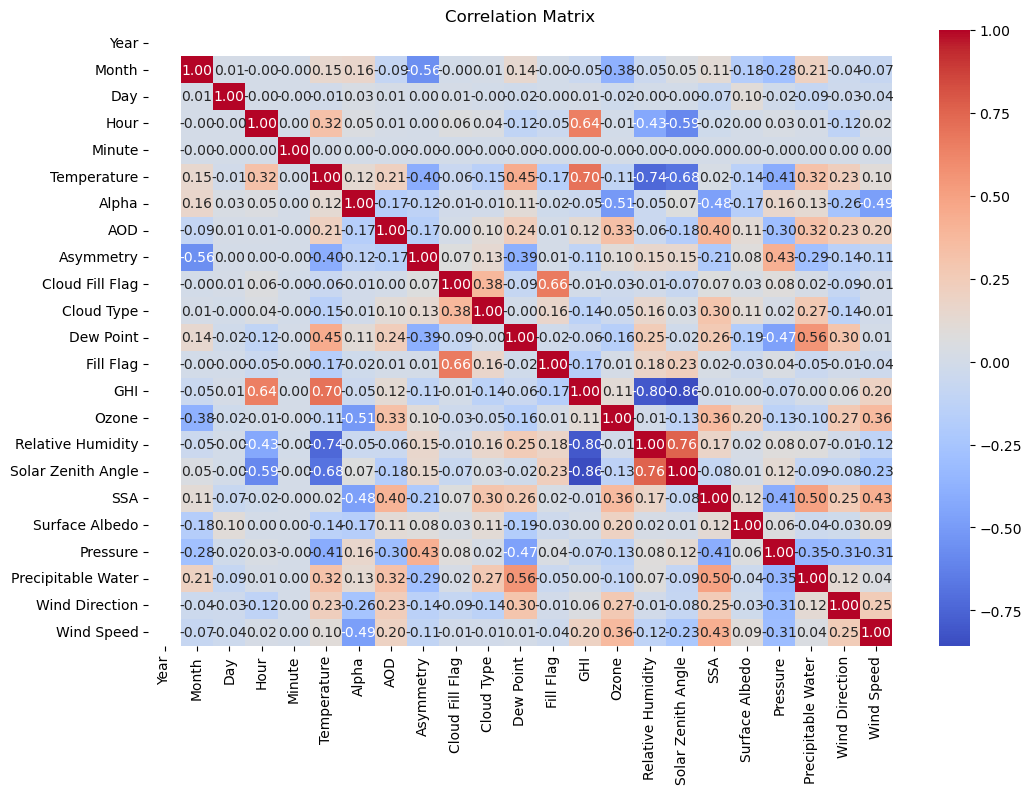

In [33]:
#Correlation matrix anaylsis with dropped solar radiation indicators exluding GHI
corr_matrix = data.corr()

# Correlation of all features with GHI
dhi_corr = corr_matrix['GHI'].sort_values(ascending=False)
print(dhi_corr)

# Heatmap for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Regression Equation:
GHI = -8795.06 + (0.00 * Year) + (-0.40 * Month) + (0.38 * Day) + (10.44 * Hour) + (0.03 * Minute) + (28.99 * Temperature) + (-4.56 * Alpha) + (-81.30 * AOD) + (1072.87 * Asymmetry) + (-16.64 * Cloud Fill Flag) + (-5.84 * Cloud Type) + (-12.68 * Dew Point) + (0.62 * Fill Flag) + (565.13 * Ozone) + (-1.06 * Relative Humidity) + (-2.98 * Solar Zenith Angle) + (828.69 * SSA) + (1108.01 * Surface Albedo) + (7.09 * Pressure) + (-21.98 * Precipitable Water) + (-0.08 * Wind Direction) + (16.54 * Wind Speed)

Evaluation Metrics:
Mean Absolute Error (MAE): 93.49
Root Mean Squared Error (RMSE): 119.41
R² Score: 0.85


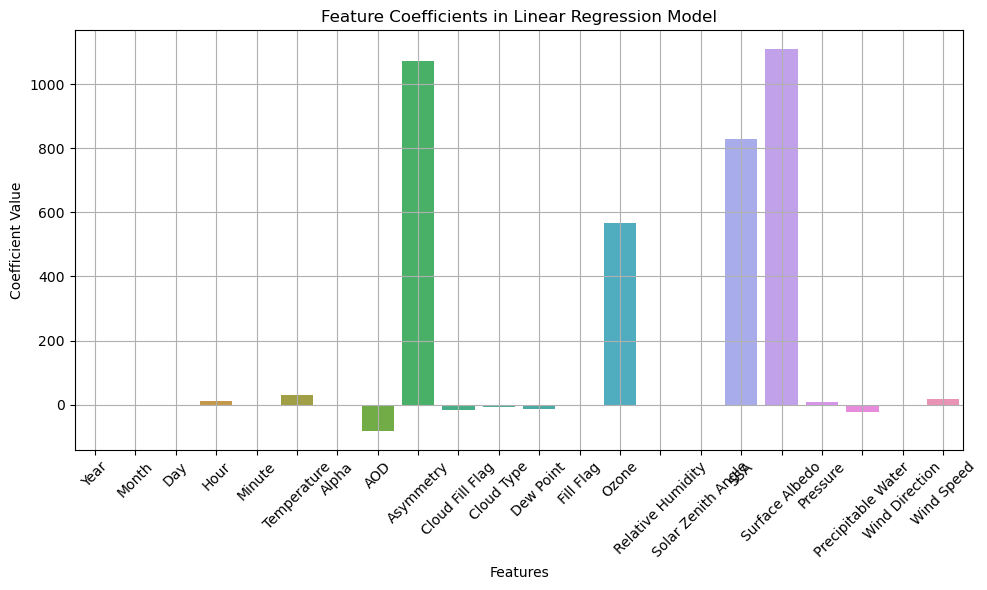

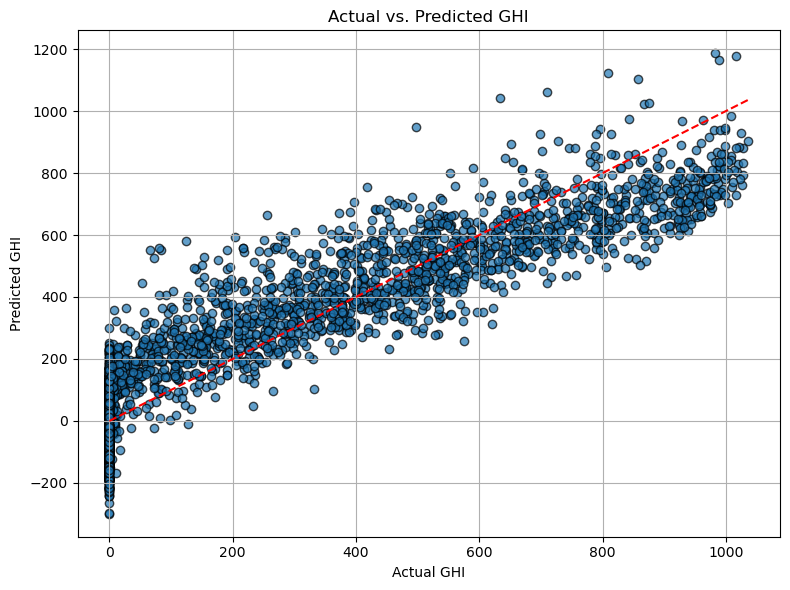

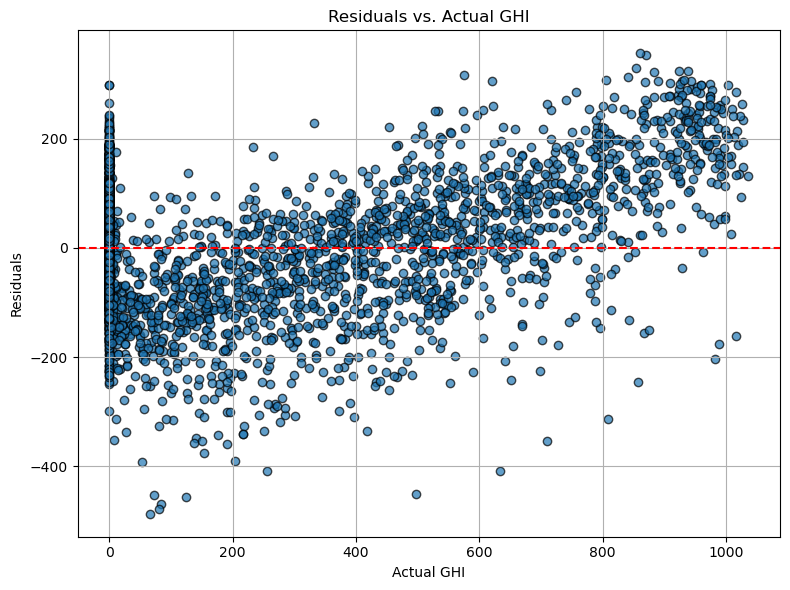

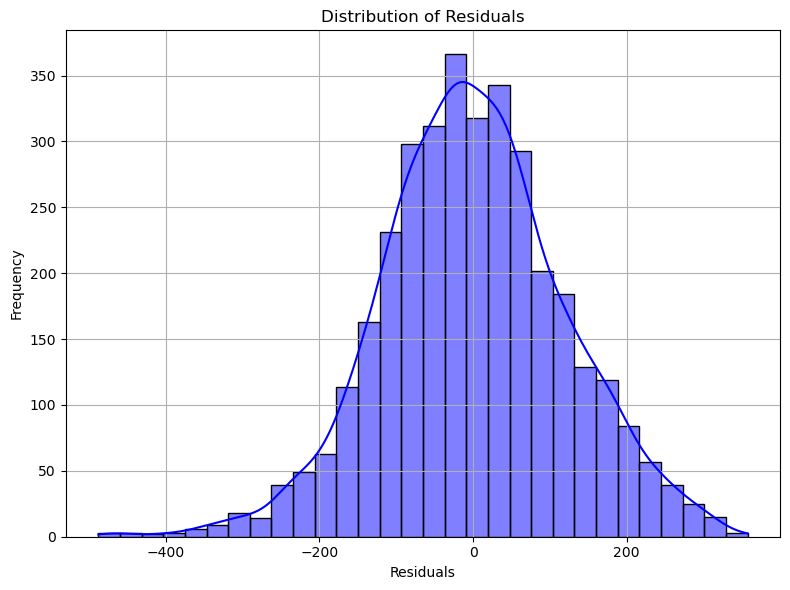

In [35]:
#Linear Regression Anaylsis with dropped solar radiation indicator features (excluding GHI)


# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

# Load the dataset
file_path = 'simplified_GHI_dataset.csv'  # Adjust the file path if necessary
data = pd.read_csv(file_path)

# Prepare features (X) and target (y)
X = data.drop(columns=['GHI'])  # Features
y = data['GHI']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display the regression equation
coefficients = model.coef_
intercept = model.intercept_
equation = f"GHI = {intercept:.2f} + " + " + ".join([f"({coeff:.2f} * {col})" for coeff, col in zip(coefficients, X.columns)])

# Print results
print("Regression Equation:")
print(equation)
print("\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


# Visualization


# 1. Plot the Regression Equation Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=coefficients)
plt.title('Feature Coefficients in Linear Regression Model')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

#  Scatter Plot: Actual vs. Predicted GHI
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.title('Actual vs. Predicted GHI')
plt.xlabel('Actual GHI')
plt.ylabel('Predicted GHI')
plt.grid()
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.tight_layout()
plt.show()

# Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.7, edgecolors='k')
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals vs. Actual GHI')
plt.xlabel('Actual GHI')
plt.ylabel('Residuals')
plt.grid()
plt.tight_layout()
plt.show()

# 4. Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()


Regression Equation:
GHI = -8546.80 + (0.00 * Year) + (-0.80 * Month) + (0.78 * Day) + (9.63 * Hour) + (-0.18 * Minute) + (24.06 * Temperature) + (-17.63 * Alpha) + (-46.85 * AOD) + (896.31 * Asymmetry) + (-18.71 * Cloud Fill Flag) + (-4.96 * Cloud Type) + (-9.09 * Dew Point) + (0.75 * Fill Flag) + (635.61 * Ozone) + (-1.35 * Relative Humidity) + (-3.43 * Solar Zenith Angle) + (731.09 * SSA) + (475.23 * Surface Albedo) + (7.23 * Pressure) + (-24.57 * Precipitable Water) + (-0.03 * Wind Direction) + (9.11 * Wind Speed)

Evaluation Metrics:
Mean Absolute Error (MAE): 93.487883
Root Mean Squared Error (RMSE): 119.405539
R² Score (Actual): 0.845126
Adjusted R² Score: 0.844147
Predicted R² Score: 0.844777


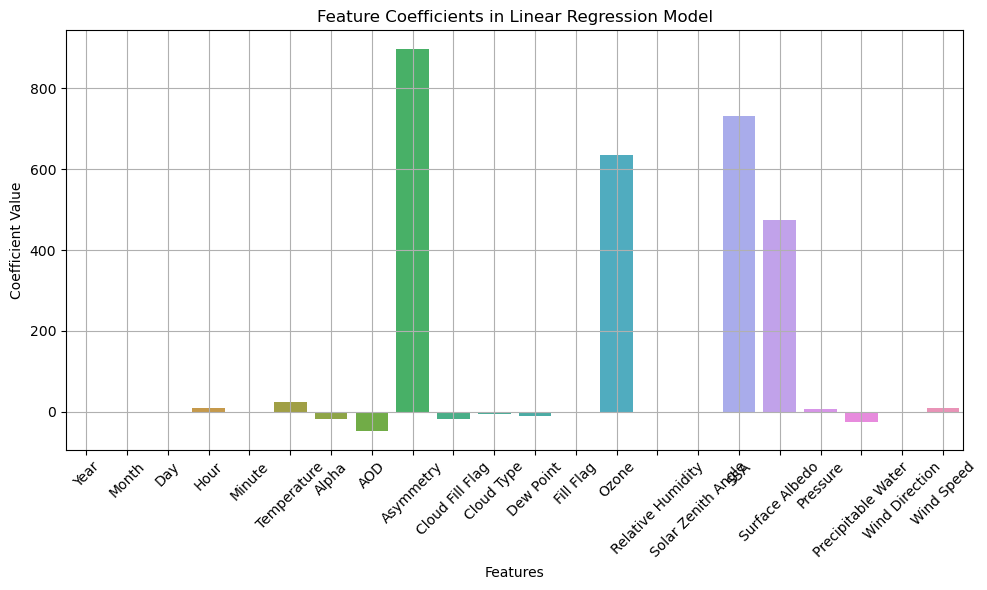

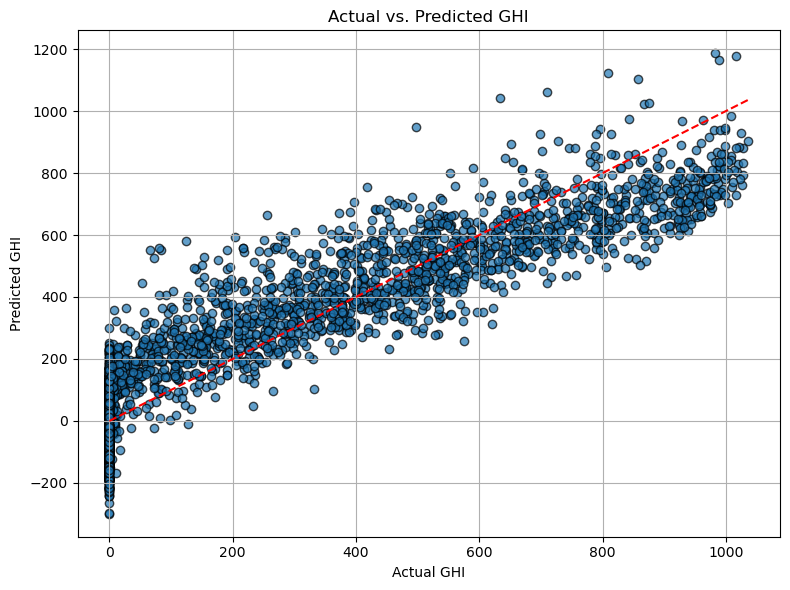

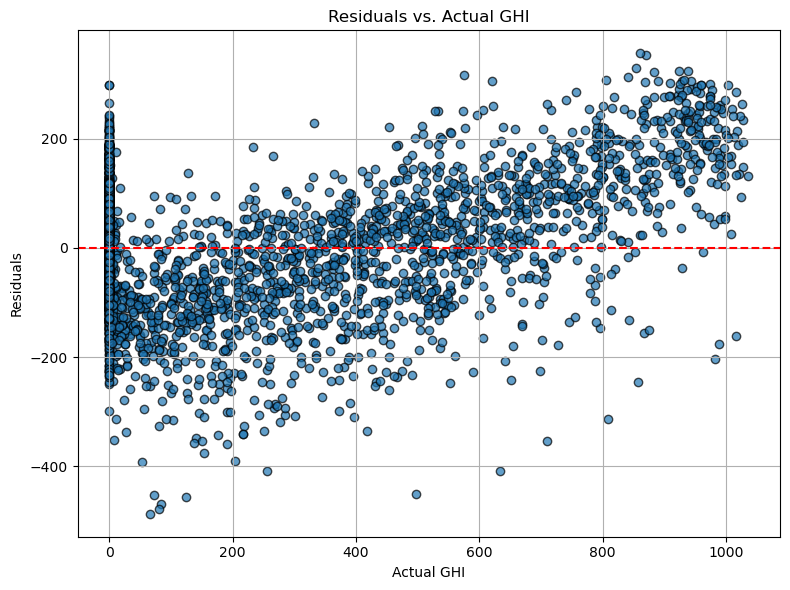

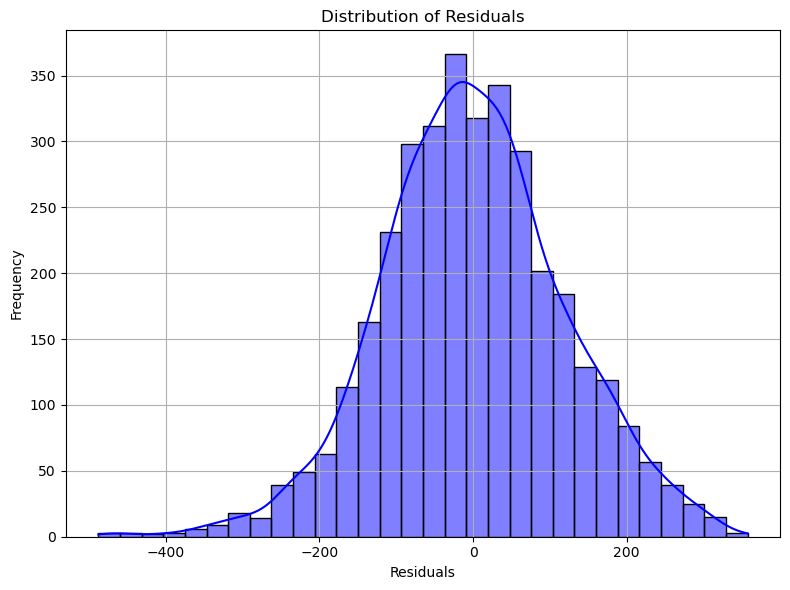

In [10]:
#Linear Regression Analysis with more dropped features with low correlation to GHI

#Import nessesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

# Load dataset
file_path = 'simplified_GHI_dataset.csv'  # Adjust the file path if necessary
data = pd.read_csv(file_path)

# Prepare features (X) and target (y)
X = data.drop(columns=['GHI'])  # Features
y = data['GHI']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# ====================
# Calculate Adjusted R² Value
# ====================
n = len(y_test)  # Number of observations in the test set
p = X_train.shape[1]  # Number of predictors (features)
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# ====================
# Calculate Predicted R² Value
# ====================
kf = KFold(n_splits=5, shuffle=True, random_state=42)
pred_r2_scores = []

for train_index, val_index in kf.split(X_test):
    X_val_train, X_val = X_test.iloc[train_index], X_test.iloc[val_index]
    y_val_train, y_val = y_test.iloc[train_index], y_test.iloc[val_index]
    
    model.fit(X_val_train, y_val_train)  # Train on validation training set
    y_val_pred = model.predict(X_val)  # Predict on validation fold
    
    pred_r2_scores.append(r2_score(y_val, y_val_pred))  # Compute R² for this fold

pred_r2 = np.mean(pred_r2_scores)

# ====================
# Display the regression equation
# ====================
coefficients = model.coef_
intercept = model.intercept_
equation = f"GHI = {intercept:.2f} + " + " + ".join([f"({coeff:.2f} * {col})" for coeff, col in zip(coefficients, X.columns)])

# Print results
print("Regression Equation:")
print(equation)
print("\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"R² Score (Actual): {r2:.6f}")
print(f"Adjusted R² Score: {adjusted_r2:.6f}")
print(f"Predicted R² Score: {pred_r2:.6f}")

# Visualization Section

# 1. Plot the Regression Equation Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=coefficients)
plt.title('Feature Coefficients in Linear Regression Model')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 2. Scatter Plot: Actual vs. Predicted GHI
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.title('Actual vs. Predicted GHI')
plt.xlabel('Actual GHI')
plt.ylabel('Predicted GHI')
plt.grid()
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.tight_layout()
plt.show()

# 3. Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.7, edgecolors='k')
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals vs. Actual GHI')
plt.xlabel('Actual GHI')
plt.ylabel('Residuals')
plt.grid()
plt.tight_layout()
plt.show()

# 4. Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()



Regression Equation:
GHI = -2379.00 + (0.00 * Year) + (-0.76 * Month) + (-0.34 * Day) + (2.14 * Hour) + (0.12 * Minute) + (-0.17 * Temperature) + (31.57 * Alpha) + (-120.52 * AOD) + (270.96 * Asymmetry) + (9.33 * Cloud Fill Flag) + (-23.20 * Cloud Type) + (5.25 * Dew Point) + (0.87 * Fill Flag) + (217.63 * Ozone) + (-3.17 * Relative Humidity) + (-12.08 * Solar Zenith Angle) + (724.90 * SSA) + (2040.10 * Surface Albedo) + (2.51 * Pressure) + (-43.81 * Precipitable Water) + (-0.00 * Wind Direction) + (4.52 * Wind Speed)

Evaluation Metrics:
Mean Absolute Error (MAE): 55.22
Root Mean Squared Error (RMSE): 77.75
R² Score (Actual): 0.93
Adjusted R² Score: 0.93
Predicted R² Score: 0.93


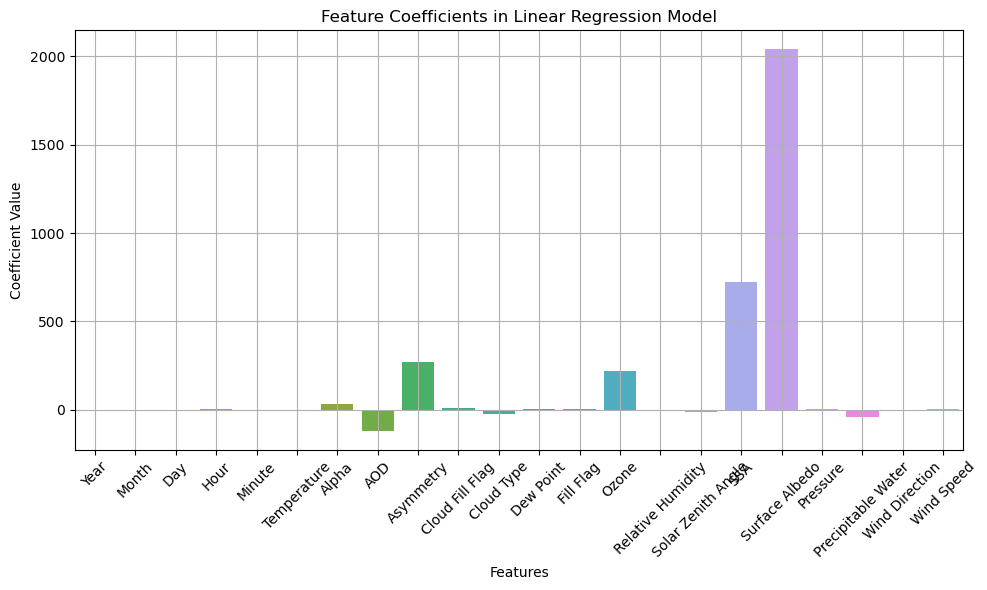

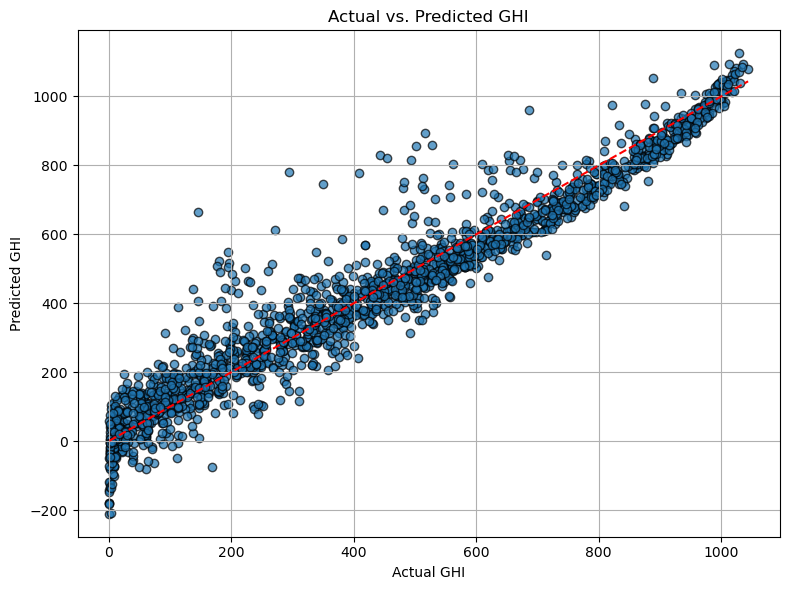

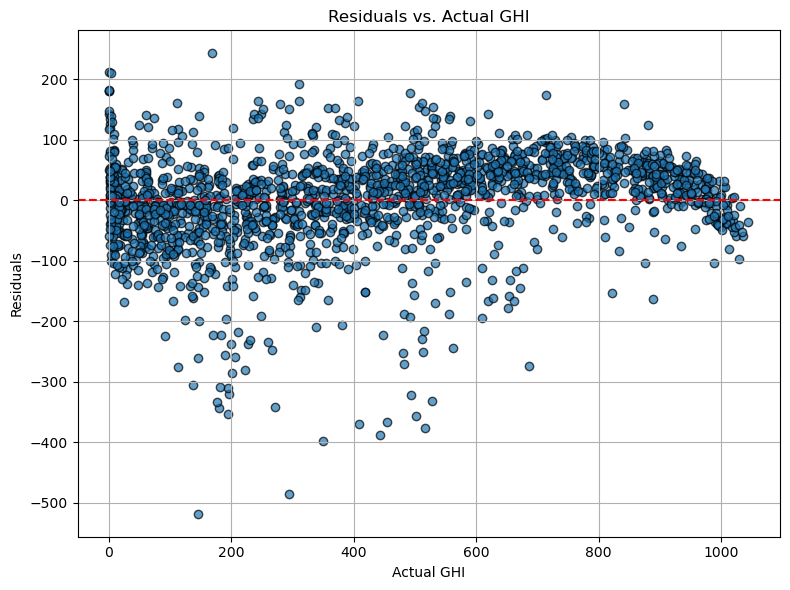

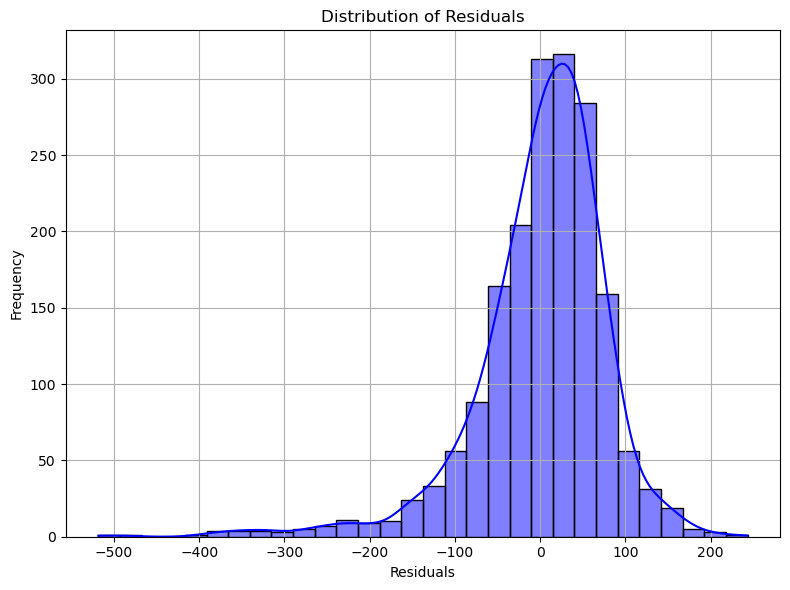

In [4]:
#Linear Regression Anaylsis with removed points at GHI of zero
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

# Load the dataset
file_path = 'simplified_GHI_dataset4.csv'  # Adjust the file path if necessary
data = pd.read_csv(file_path)

# Prepare features (X) and target (y)
X = data.drop(columns=['GHI'])  # Features
y = data['GHI']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


# Calculate Adjusted R² Value
n = len(y_test)  # Number of observations in the test set
p = X_train.shape[1]  # Number of predictors (features)
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))


# Calculate Predicted R² Value

kf = KFold(n_splits=5, shuffle=True, random_state=42)
pred_r2_scores = []

for train_index, val_index in kf.split(X_test):
    X_val_train, X_val = X_test.iloc[train_index], X_test.iloc[val_index]
    y_val_train, y_val = y_test.iloc[train_index], y_test.iloc[val_index]
    
    model.fit(X_val_train, y_val_train)  # Train on validation training set
    y_val_pred = model.predict(X_val)  # Predict on validation fold
    
    pred_r2_scores.append(r2_score(y_val, y_val_pred))  # Compute R² for this fold

pred_r2 = np.mean(pred_r2_scores)


# Display the regression equation

coefficients = model.coef_
intercept = model.intercept_
equation = f"GHI = {intercept:.2f} + " + " + ".join([f"({coeff:.2f} * {col})" for coeff, col in zip(coefficients, X.columns)])

# Print results
print("Regression Equation:")
print(equation)
print("\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score (Actual): {r2:.2f}")
print(f"Adjusted R² Score: {adjusted_r2:.2f}")
print(f"Predicted R² Score: {pred_r2:.2f}")


# Visualization Section


# Plot the Regression Equation Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=coefficients)
plt.title('Feature Coefficients in Linear Regression Model')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

#  Scatter Plot: Actual vs. Predicted GHI
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.title('Actual vs. Predicted GHI')
plt.xlabel('Actual GHI')
plt.ylabel('Predicted GHI')
plt.grid()
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.tight_layout()
plt.show()

#  Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.7, edgecolors='k')
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals vs. Actual GHI')
plt.xlabel('Actual GHI')
plt.ylabel('Residuals')
plt.grid()
plt.tight_layout()
plt.show()

# Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()



GHI                   1.000000
Temperature           0.612366
Hour                  0.519855
Ozone                 0.153268
Wind Speed            0.136481
AOD                   0.120760
Wind Direction        0.105371
Surface Albedo        0.014535
Day                   0.011422
Minute                0.000421
Dew Point            -0.048445
Precipitable Water   -0.049415
SSA                  -0.056121
Pressure             -0.067176
Alpha                -0.067652
Month                -0.079771
Asymmetry            -0.131637
Fill Flag            -0.206905
Cloud Fill Flag      -0.214092
Cloud Type           -0.262070
Relative Humidity    -0.718260
Solar Zenith Angle   -0.925443
Year                       NaN
Name: GHI, dtype: float64


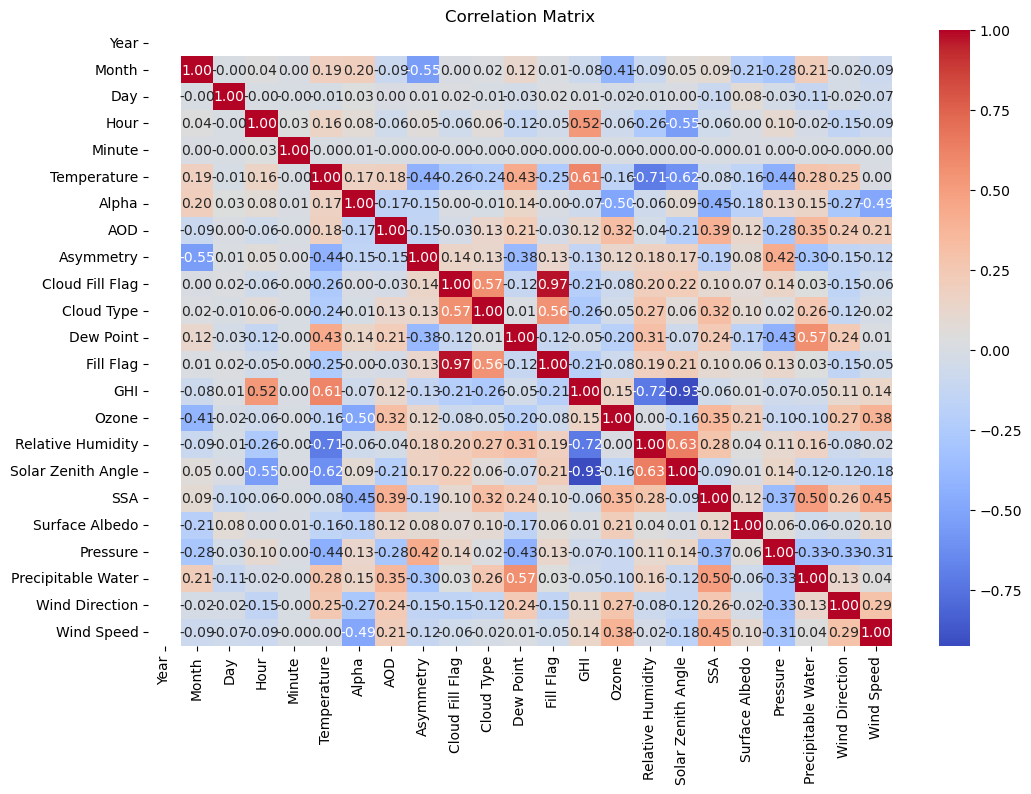

In [20]:
#Correlation matrix of final simplified dataset
corr_matrix = data.corr()

# Correlation of all features with DHI
dhi_corr = corr_matrix['GHI'].sort_values(ascending=False)
print(dhi_corr)

# Heatmap for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Decision Tree Regression Evaluation Metrics:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Absolute Error (MAE): 24.670886
Root Mean Squared Error (RMSE): 44.292284
Actual R² Score: 0.978257
Predicted R² Score (Cross-Validation): 0.966378


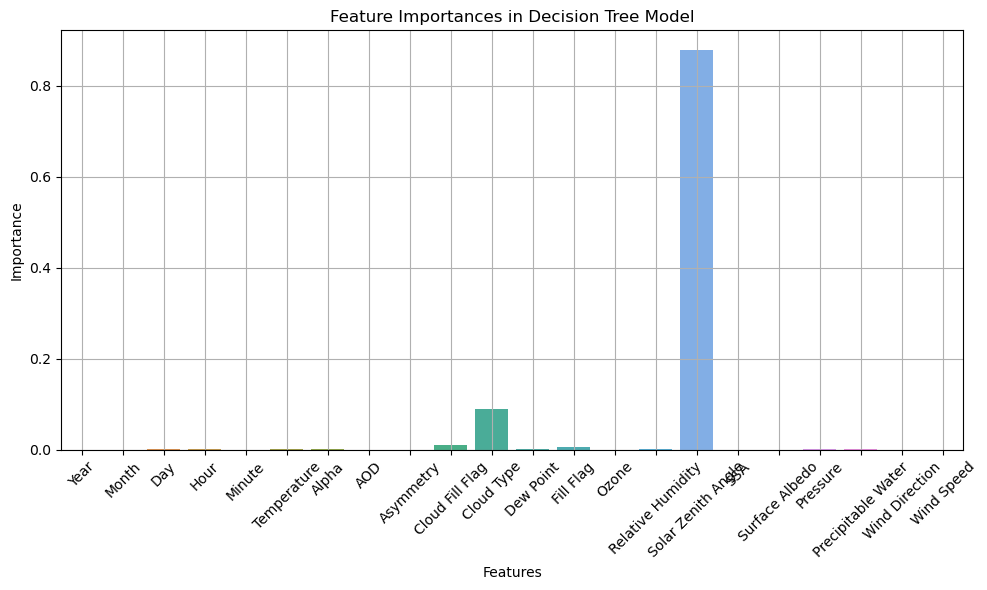

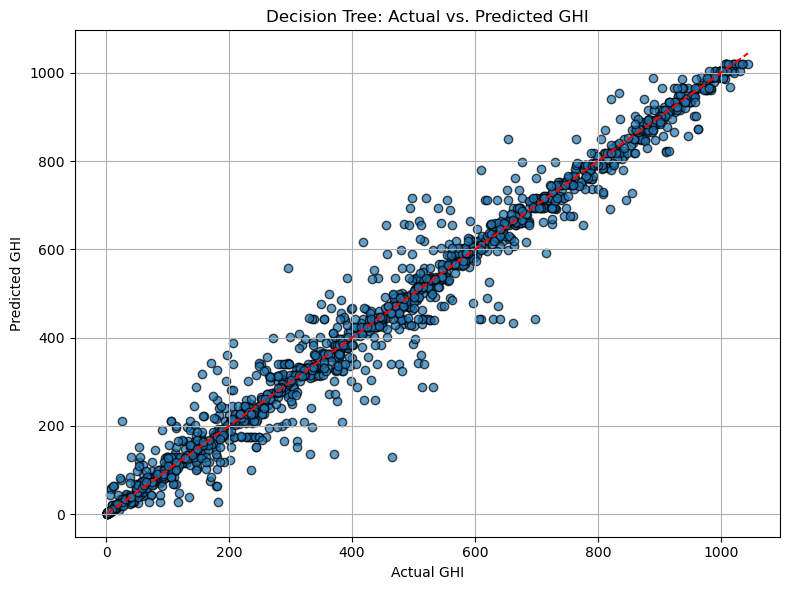

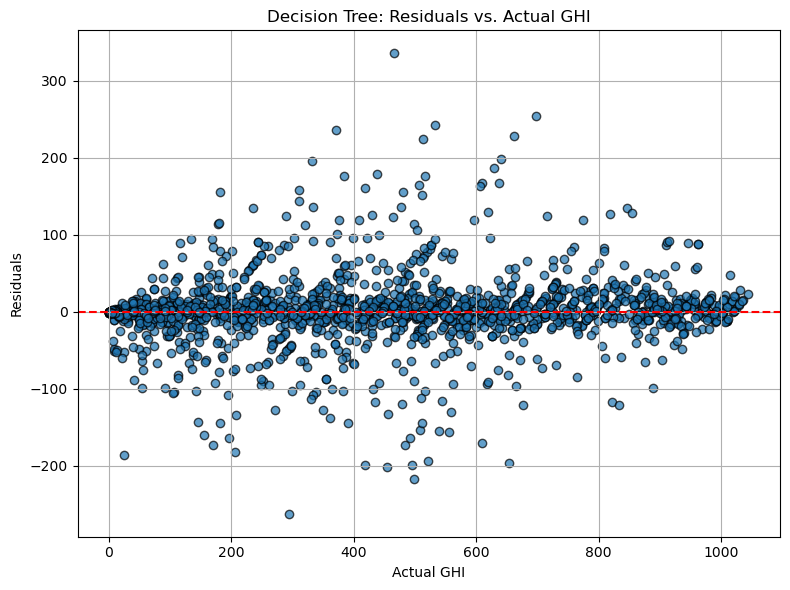

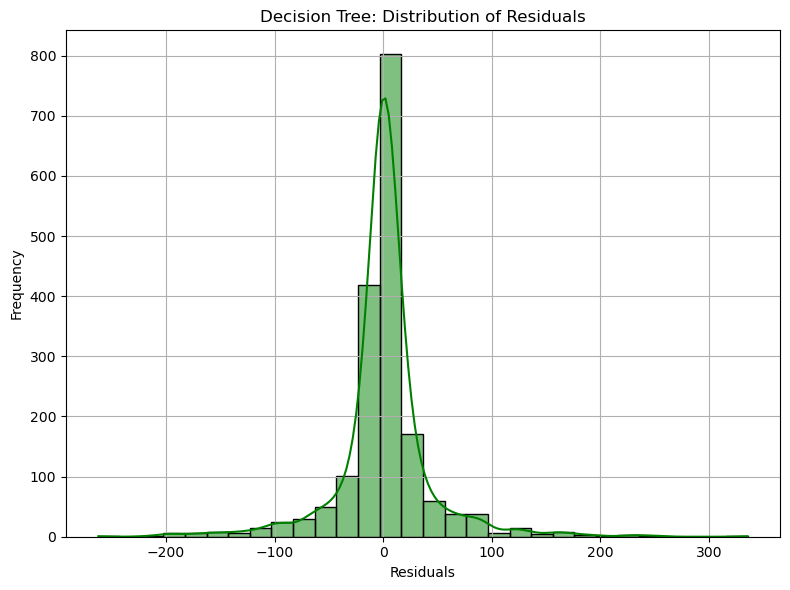

In [19]:
#Decision Tree Regression Anaysis 

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = 'simplified_GHI_dataset4.csv' 
data = pd.read_csv(file_path)

# Prepare features (X) and target (y)
X = data.drop(columns=['GHI'])  # Features
y = data['GHI']  # Target variable

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor with Grid Search for Hyperparameter Tuning
param_grid = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from Grid Search
best_tree_model = grid_search.best_estimator_

# Make predictions using the best model
y_tree_pred = best_tree_model.predict(X_test)

# Evaluate the Decision Tree model
tree_mae = mean_absolute_error(y_test, y_tree_pred)
tree_rmse = np.sqrt(mean_squared_error(y_test, y_tree_pred))
tree_r2_actual = r2_score(y_test, y_tree_pred)

# Calculate Predicted R² using cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
predicted_r2 = cross_val_score(best_tree_model, X_test, y_test, cv=kf, scoring='r2').mean()

# Print results
print("Decision Tree Regression Evaluation Metrics:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Absolute Error (MAE): {tree_mae:.6f}")
print(f"Root Mean Squared Error (RMSE): {tree_rmse:.6f}")
print(f"Actual R² Score: {tree_r2_actual:.6f}")
print(f"Predicted R² Score (Cross-Validation): {predicted_r2:.6f}")


# Visualization  

#  Feature Importance Plot
plt.figure(figsize=(10, 6))
feature_importances = best_tree_model.feature_importances_
sns.barplot(x=X.columns, y=feature_importances)
plt.title('Feature Importances in Decision Tree Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Scatter Plot: Actual vs. Predicted GHI
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_tree_pred, alpha=0.7, edgecolors='k')
plt.title('Decision Tree: Actual vs. Predicted GHI')
plt.xlabel('Actual GHI')
plt.ylabel('Predicted GHI')
plt.grid()
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.tight_layout()
plt.show()

# Residuals Plot
tree_residuals = y_test - y_tree_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, tree_residuals, alpha=0.7, edgecolors='k')
plt.axhline(0, color='r', linestyle='--')
plt.title('Decision Tree: Residuals vs. Actual GHI')
plt.xlabel('Actual GHI')
plt.ylabel('Residuals')
plt.grid()
plt.tight_layout()
plt.show()

# Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(tree_residuals, kde=True, bins=30, color='green')
plt.title('Decision Tree: Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()


In [18]:
#Stacking Regressor Analysis using Linear Regression as Meta Regressor

from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
file_path = 'simplified_GHI_dataset4.csv'  
data = pd.read_csv(file_path)

# Prepare features (X) and target (y)
X = data.drop(columns=['GHI'])  # Features
y = data['GHI']  # Target variable

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
linear_regressor = LinearRegression()
decision_tree_regressor = DecisionTreeRegressor(max_depth=10, random_state=42)

# Define stacking regressor as Linear Regression
stacking_regressor = StackingRegressor(
    estimators=[
        ('lr', linear_regressor),
        ('dt', decision_tree_regressor)
    ],
    final_estimator=LinearRegression()
)

# Train stacking regressor
stacking_regressor.fit(X_train, y_train)

# Make predictions
y_stack_pred = stacking_regressor.predict(X_test)

# Evaluate actual R²
actual_r2 = r2_score(y_test, y_stack_pred)

# Evaluate predicted R² using cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
predicted_r2 = cross_val_score(stacking_regressor, X_test, y_test, cv=kf, scoring='r2').mean()

# Calculate other metrics
stack_mae = mean_absolute_error(y_test, y_stack_pred)
stack_rmse = mean_squared_error(y_test, y_stack_pred, squared=False)

# Print evaluation metrics
print("Stacking Regression Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {stack_mae:.6f}")
print(f"Root Mean Squared Error (RMSE): {stack_rmse:.6f}")
print(f"Actual R² Score: {actual_r2:.6f}")
print(f"Predicted R² Score (Cross-Validation): {predicted_r2:.6f}")


Stacking Regression Evaluation Metrics:
Mean Absolute Error (MAE): 26.096234
Root Mean Squared Error (RMSE): 44.373088
Actual R² Score: 0.978177
Predicted R² Score (Cross-Validation): 0.968951


In [54]:
#Preproccessing for SanMateo data for the year 2022

import pandas as pd

# Load data
sanmat = pd.read_csv('SanMateo.csv')

# Drop all solar radiation indicators except GHI
features_to_drop = ['Clearsky GHI', 'Clearsky DHI', 'Clearsky DNI', 'DHI', 'DNI','Year', 'Month', 'Day', 'Minute', 'Cloud Fill Flag', 'Fill Flag','Ozone','Asymmetry']

sanmat = sanmat.drop(columns=features_to_drop)



# Check dataset after modifications
print(sanmat.head())

# Save the cleaned dataset 
sanmat.to_csv('SanMateo.csv', index=False)

   Hour  Temperature  Alpha    AOD  Cloud Type  Dew Point  GHI  \
0     0          8.2   0.69  0.035           0        5.9   48   
1     1          7.0   0.70  0.032           0        5.2    0   
2     2          6.5   0.71  0.029           0        5.4    0   
3     3          6.0   0.74  0.026           0        5.5    0   
4     4          5.4   0.78  0.023           0        5.4    0   

   Relative Humidity  Solar Zenith Angle   SSA  Surface Albedo  Pressure  \
0              85.39               85.59  0.94            0.11      1006   
1              88.52               96.11  0.94            0.11      1007   
2              92.67              107.20  0.93            0.11      1007   
3              96.48              118.76  0.93            0.11      1008   
4             100.00              130.56  0.92            0.11      1008   

   Precipitable Water  Wind Direction  Wind Speed  
0                 1.0             323         2.6  
1                 1.0             325     

In [55]:
#verify data
sanmat

Hour  Temperature  Alpha    AOD  Cloud Type  Dew Point  GHI  \
0        0          8.2   0.69  0.035           0        5.9   48   
1        1          7.0   0.70  0.032           0        5.2    0   
2        2          6.5   0.71  0.029           0        5.4    0   
3        3          6.0   0.74  0.026           0        5.5    0   
4        4          5.4   0.78  0.023           0        5.4    0   
...    ...          ...    ...    ...         ...        ...  ...   
8755    19         13.7   0.92  0.035           6       13.0   68   
8756    20         13.4   0.95  0.036           6       12.6   26   
8757    21         12.8   1.05  0.056           9       12.0   39   
8758    22         12.2   1.16  0.053           6       11.1   37   
8759    23         11.9   1.25  0.040           7       10.0   21   

      Relative Humidity  Solar Zenith Angle   SSA  Surface Albedo  Pressure  \
0                 85.39               85.59  0.94            0.11      1006   
1                 88.52               96.11  0.94            0.11      1007   
2                 92.67              107.20  0.93            0.11      1007   
3                 96.48              118.76  0.93            0.11      1008   
4                100.00              130.56  0.92            0.11      1008   
...                 ...                 ...   ...             ...       ...   
8755              95.30               61.71  0.92            0.12       996   
8756              94.75               61.05  0.93            0.12       995   
8757              94.59               63.58  0.95            0.12       994   
8758              93.07               68.94  0.94            0.12       994   
8759              88.31               76.52  0.93            0.12       995   

      Precipitable Water  Wind Direction  Wind Speed  
0                    1.0             323         2.6  
1                    1.0             325         2.7  
2                    0.9             327         2.8  
3                    0.9             328         2.8  
4                    0.8             329         2.7  
...                  ...             ...         ...  
8755                 2.9              25         1.9  
8756                 2.8              11         3.2  
8757                 2.7               5         4.5  
8758                 2.5             182         5.4  
8759                 2.3             359         5.6  

[8760 rows x 15 columns]

In [56]:
#data preproccessing for Berkley 2022
import pandas as pd

# Load data
berk = pd.read_csv('Berkley.csv')

# Drop all solar radiation indicators except GHI
features_to_drop = ['Clearsky GHI', 'Clearsky DHI', 'Clearsky DNI', 'DHI', 'DNI']


berk = berk.drop(columns=features_to_drop)



# Check dataset after modifications
print(berk.head())

# Save the cleaned dataset 
berk.to_csv('Berkley.csv', index=False)


   Hour  Temperature  Alpha    AOD  Cloud Type  Dew Point  GHI  \
0     0          8.8   0.63  0.037           0        6.2   50   
1     1          7.7   0.63  0.034           2        5.8    0   
2     2          7.3   0.65  0.031           2        5.9    0   
3     3          6.8   0.69  0.027           2        5.9    0   
4     4          6.3   0.74  0.023           2        5.8    0   

   Relative Humidity  Solar Zenith Angle   SSA  Surface Albedo  Pressure  \
0              83.65               85.46  0.94             0.1      1012   
1              87.53               95.95  0.94             0.1      1013   
2              90.63              107.03  0.93             0.1      1013   
3              93.91              118.58  0.93             0.1      1014   
4              96.46              130.37  0.92             0.1      1014   

   Precipitable Water  Wind Direction  Wind Speed  
0                 1.0             323         2.8  
1                 1.0             325     

In [57]:
#verify data
berk

Hour  Temperature  Alpha    AOD  Cloud Type  Dew Point  GHI  \
0        0          8.8   0.63  0.037           0        6.2   50   
1        1          7.7   0.63  0.034           2        5.8    0   
2        2          7.3   0.65  0.031           2        5.9    0   
3        3          6.8   0.69  0.027           2        5.9    0   
4        4          6.3   0.74  0.023           2        5.8    0   
...    ...          ...    ...    ...         ...        ...  ...   
8755    19         13.3   0.91  0.035           6       12.4   30   
8756    20         12.9   1.00  0.034           9       11.8   44   
8757    21         12.5   1.16  0.058           6       11.1   44   
8758    22         12.1   1.26  0.055           6       10.2   46   
8759    23         11.9   1.32  0.037           4        9.2   26   

      Relative Humidity  Solar Zenith Angle   SSA  Surface Albedo  Pressure  \
0                 83.65               85.46  0.94             0.1      1012   
1                 87.53               95.95  0.94             0.1      1013   
2                 90.63              107.03  0.93             0.1      1013   
3                 93.91              118.58  0.93             0.1      1014   
4                 96.46              130.37  0.92             0.1      1014   
...                 ...                 ...   ...             ...       ...   
8755              94.56               61.78  0.92             0.1      1002   
8756              93.30               61.07  0.93             0.1      1001   
8757              91.11               63.55  0.95             0.1      1001   
8758              88.04               68.87  0.94             0.1      1001   
8759              83.53               76.41  0.93             0.1      1001   

      Precipitable Water  Wind Direction  Wind Speed  
0                    1.0             323         2.8  
1                    1.0             325         2.9  
2                    1.0             327         2.9  
3                    0.9             328         2.9  
4                    0.8             329         2.9  
...                  ...             ...         ...  
8755                 2.9              25         1.6  
8756                 2.8              11         3.3  
8757                 2.6               5         4.8  
8758                 2.3             182         5.5  
8759                 2.2             359         5.5  

[8760 rows x 15 columns]

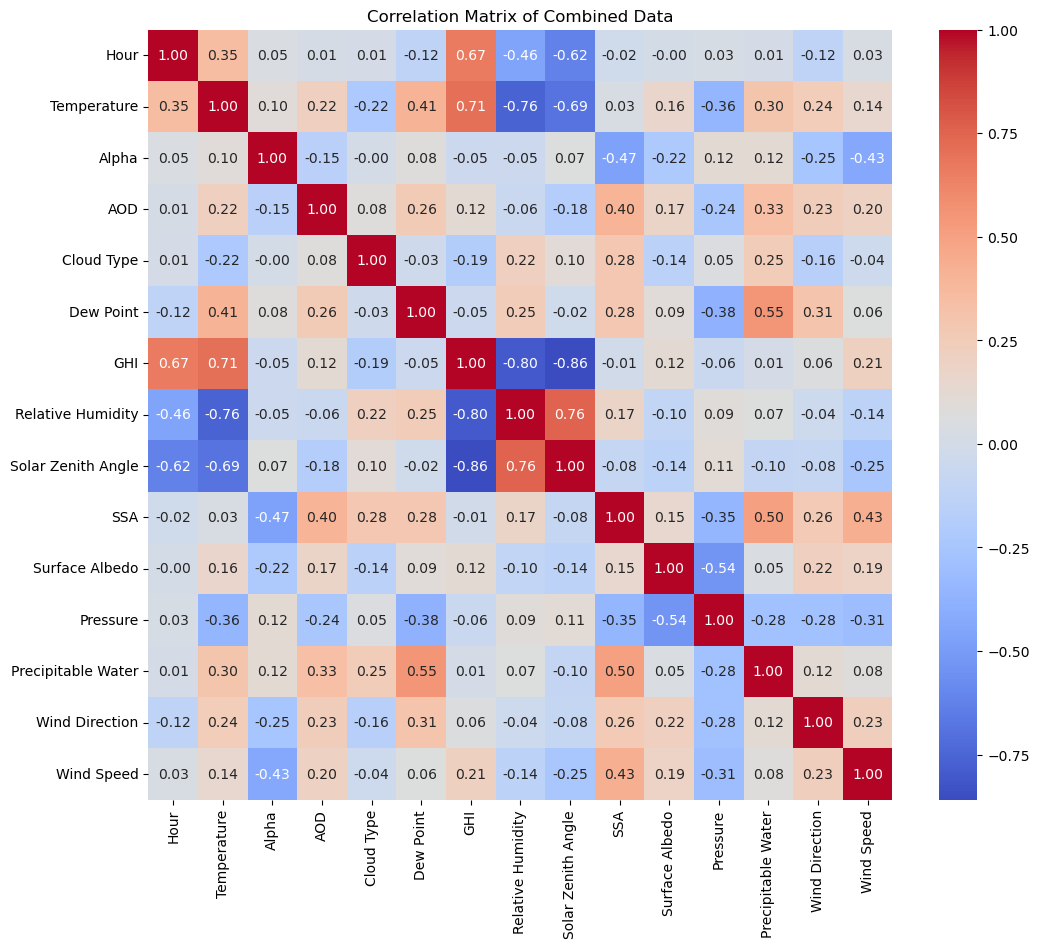

Stacking Regression Evaluation Metrics:
Mean Absolute Error (MAE): 15.417259
Root Mean Squared Error (RMSE): 37.014715
Actual R² Score: 0.985904
Predicted R² Score (Cross-Validation): 0.977229


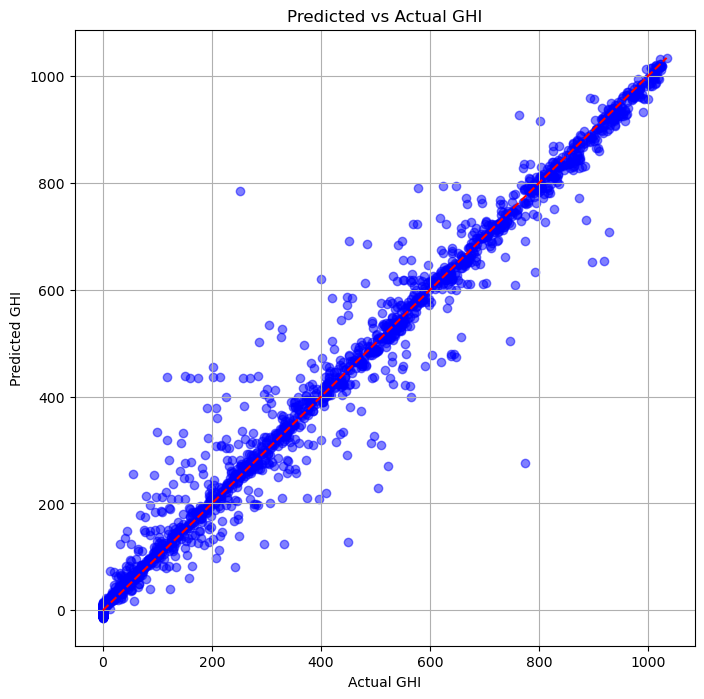

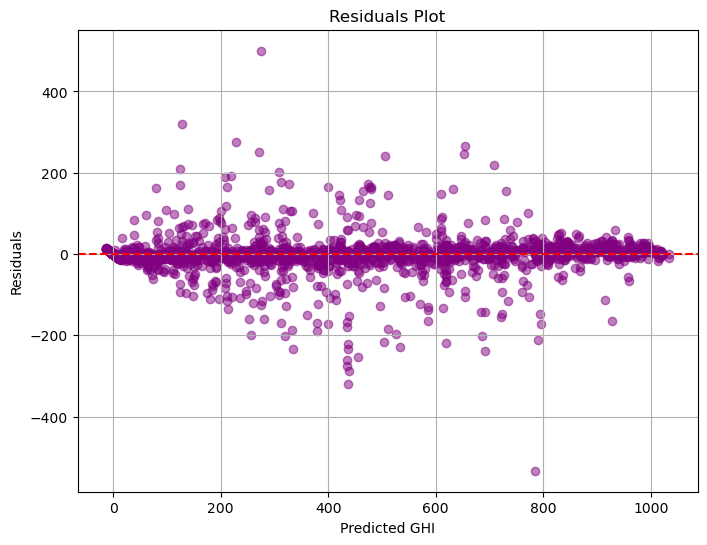

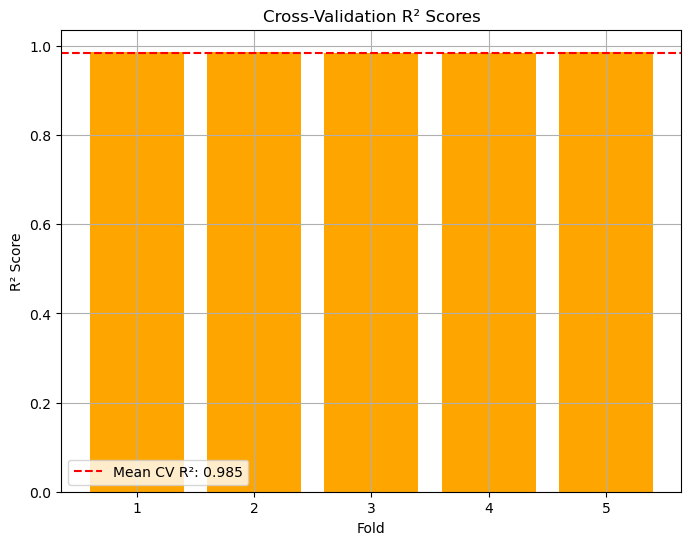


Equation of the Stacking Regressor (Final Estimator):
y = 0.053*lr + 0.950*dt + -0.113

Equation of the Base Linear Regression Model:
y = 11.081*Hour + 27.080*Temperature + -13.197*Alpha + 6.518*AOD + -5.026*Cloud Type + -13.804*Dew Point + 0.128*Relative Humidity + -3.105*Solar Zenith Angle + 606.917*SSA + 1724.305*Surface Albedo + 6.841*Pressure + -32.057*Precipitable Water + -0.048*Wind Direction + 21.953*Wind Speed + -7550.969


In [58]:
#Combine data for San Mateo and Berkley and perfrom the stacking regressor

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the San Mateo and Berkley datasets
san_mateo_path = 'SanMateo.csv'
berkley_path = 'Berkley.csv'

san_mateo_data = pd.read_csv(san_mateo_path)
berkley_data = pd.read_csv(berkley_path)

# Harmonize columns by selecting the common subset
common_columns = list(set(san_mateo_data.columns) & set(berkley_data.columns))
san_mateo_data = san_mateo_data[common_columns]
berkley_data = berkley_data[common_columns]

# Combine the datasets
combined_data = pd.concat([sanmat, berk], ignore_index=True)

# Display correlation matrix
correlation_matrix = combined_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Combined Data")
plt.show()

# Prepare features (X) and target (y)
X = combined_data.drop(columns=['GHI'])  # Features
y = combined_data['GHI']  # Target variable

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
linear_regressor = LinearRegression()
decision_tree_regressor = DecisionTreeRegressor(max_depth=10, random_state=42)

# Define stacking regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('lr', linear_regressor),
        ('dt', decision_tree_regressor)
    ],
    final_estimator=LinearRegression()
)

# Train stacking regressor
stacking_regressor.fit(X_train, y_train)

# Make predictions
y_stack_pred = stacking_regressor.predict(X_test)

# Evaluate actual R²
actual_r2 = r2_score(y_test, y_stack_pred)

# Evaluate predicted R² using cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
predicted_r2 = cross_val_score(stacking_regressor, X_test, y_test, cv=kf, scoring='r2').mean()

# Calculate other metrics
stack_mae = mean_absolute_error(y_test, y_stack_pred)
stack_rmse = mean_squared_error(y_test, y_stack_pred, squared=False)

# Print evaluation metrics
print("Stacking Regression Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {stack_mae:.6f}")
print(f"Root Mean Squared Error (RMSE): {stack_rmse:.6f}")
print(f"Actual R² Score: {actual_r2:.6f}")
print(f"Predicted R² Score (Cross-Validation): {predicted_r2:.6f}")

# Plot Predicted vs Actual values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_stack_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual GHI")
plt.ylabel("Predicted GHI")
plt.title("Predicted vs Actual GHI")
plt.grid()
plt.show()

# Plot residuals
residuals = y_test - y_stack_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_stack_pred, residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted GHI")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.grid()
plt.show()

# Feature Importance from Decision Tree (as one of the base models)
if hasattr(decision_tree_regressor, "feature_importances_"):
    importance = decision_tree_regressor.feature_importances_
    feature_names = X.columns
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, importance, color='teal')
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance from Decision Tree Regressor")
    plt.grid(axis='x')
    plt.show()

# Cross-validation scores visualization
cv_scores = cross_val_score(stacking_regressor, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='r2')
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cv_scores) + 1), cv_scores, color='orange')
plt.axhline(cv_scores.mean(), color='red', linestyle='--', label=f"Mean CV R²: {cv_scores.mean():.3f}")
plt.xlabel("Fold")
plt.ylabel("R² Score")
plt.title("Cross-Validation R² Scores")
plt.legend()
plt.grid()
plt.show()

# Function to display Linear Regression Equation
def display_linear_regression_equation(model, feature_names):
    coefficients = model.coef_
    intercept = model.intercept_
    equation = "y = " + " + ".join([f"{coef:.3f}*{name}" for coef, name in zip(coefficients, feature_names)])
    equation += f" + {intercept:.3f}"
    return equation

# Final estimator equation (Stacking Regressor's meta-model)
final_estimator = stacking_regressor.final_estimator_
stacking_equation = display_linear_regression_equation(final_estimator, ['lr', 'dt'])
print("\nEquation of the Stacking Regressor (Final Estimator):")
print(stacking_equation)

# Base Linear Regression equation
linear_regressor.fit(X_train, y_train)  # Ensure it's trained independently
linear_regression_equation = display_linear_regression_equation(linear_regressor, X.columns)
print("\nEquation of the Base Linear Regression Model:")
print(linear_regression_equation)



In [41]:
#use the created stacking regressor model from the combied data of San Mateo and Berkley on the preprocessed data for San Fransisco for the year 2022 named 'simplified_GHI_dataset4.csv'


# Ensure the feature names match those used during training
X_new = new_data[X_train.columns]  # Align with the training feature columns

# Predict GHI using the stacking regressor
new_data['Predicted_GHI'] = stacking_regressor.predict(X_new)

# Evaluation metrics for the new dataset
y_new_actual = new_data['GHI']
y_new_predicted = new_data['Predicted_GHI']

new_mae = mean_absolute_error(y_new_actual, y_new_predicted)
new_rmse = mean_squared_error(y_new_actual, y_new_predicted, squared=False)
new_r2_actual = r2_score(y_new_actual, y_new_predicted)

print("\nEvaluation Metrics for the New Dataset (simplified_GHI_dataset4.csv):")
print(f"Mean Absolute Error (MAE): {new_mae:.6f}")
print(f"Root Mean Squared Error (RMSE): {new_rmse:.6f}")
print(f"Actual R² Score: {new_r2_actual:.6f}")

# Display the updated dataset with Actual_GHI and Predicted_GHI
new_data_with_predictions = new_data[['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Predicted_GHI']]
new_data_with_predictions.rename(columns={'GHI': 'Actual_GHI'}, inplace=True)

# Display predictions from index 4 to 9074
print("\nActual vs Predicted GHI for the New Dataset (Rows 4 to 9074):")
print(new_data_with_predictions.iloc[1:4])
print(new_data_with_predictions.iloc[4:9075])

# Save the predictions to a new CSV file
output_path = '/mnt/data/simplified_GHI_dataset4_with_predictions.csv'
new_data_with_predictions.to_csv(output_path, index=False)
print(f"\nPredictions saved to: {output_path}")

# Calculate evaluation metrics for combined data (train and test set together)
y_combined_actual = pd.concat([y_train, y_test])
X_combined = pd.concat([X_train, X_test])
y_combined_predicted = stacking_regressor.predict(X_combined)

combined_mae = mean_absolute_error(y_combined_actual, y_combined_predicted)
combined_rmse = mean_squared_error(y_combined_actual, y_combined_predicted, squared=False)
combined_r2_actual = r2_score(y_combined_actual, y_combined_predicted)

# Calculate predicted R² for combined data using cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
combined_r2_predicted = cross_val_score(
    stacking_regressor,
    X_combined,
    y_combined_actual,
    cv=kf,
    scoring='r2'
).mean()

print("\nEvaluation Metrics for the Combined Dataset (San Mateo + Berkley):")
print(f"Mean Absolute Error (MAE): {combined_mae:.6f}")
print(f"Root Mean Squared Error (RMSE): {combined_rmse:.6f}")
print(f"Actual R² Score: {combined_r2_actual:.6f}")
print(f"Predicted R² Score (Cross-Validation): {combined_r2_predicted:.6f}")

# Combine actual and predicted GHI for the combined dataset
combined_data_with_predictions = pd.DataFrame({
    'Actual_GHI': y_combined_actual,
    'Predicted_GHI': y_combined_predicted
}).reset_index(drop=True)

# Display predictions for combined data between indices 4 and 9074
print("\nActual vs Predicted GHI for the Combined Dataset (Rows 4 to 9074):")
print(combined_data_with_predictions.iloc[4:9075])

# Save the combined dataset predictions to a file
combined_output_path = '/mnt/data/combined_dataset_with_predictions.csv'
combined_data_with_predictions.to_csv(combined_output_path, index=False)
print(f"\nCombined dataset predictions saved to: {combined_output_path}")



Evaluation Metrics for the New Dataset (simplified_GHI_dataset4.csv):
Mean Absolute Error (MAE): 28.304967
Root Mean Squared Error (RMSE): 54.074854
Actual R² Score: 0.967315

Actual vs Predicted GHI for the New Dataset (Rows 4 to 9074):
   Year  Month  Day  Hour  Minute  Actual_GHI  Predicted_GHI
1  2022      2    9    15       0           1      16.325316
2  2022      2   12    15       0           1      15.110856
3  2022      2   21     2       0           1       6.186607
      Year  Month  Day  Hour  Minute  Actual_GHI  Predicted_GHI
4     2022      2   23     2       0           1       2.613357
5     2022      3    4    14      30           1       8.107660
6     2022      3    5    14      30           1      14.641105
7     2022      3   24    14       0           1      12.030879
8     2022      3   25    14       0           1      12.149748
...    ...    ...  ...   ...     ...         ...            ...
9070  2022      6   13    20      30        1034    1023.429809
9071 

C:\Users\jchun\AppData\Local\Temp\ipykernel_17324\2716651452.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_with_predictions.rename(columns={'GHI': 'Actual_GHI'}, inplace=True)


OSError: Cannot save file into a non-existent directory: '\mnt\data'

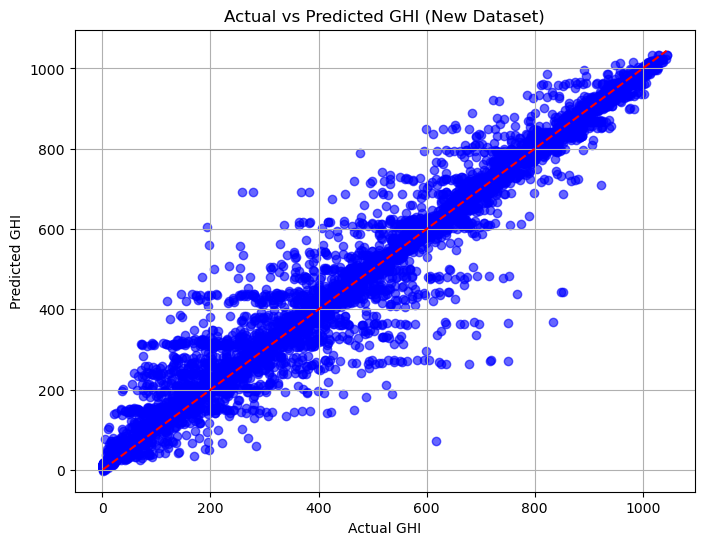

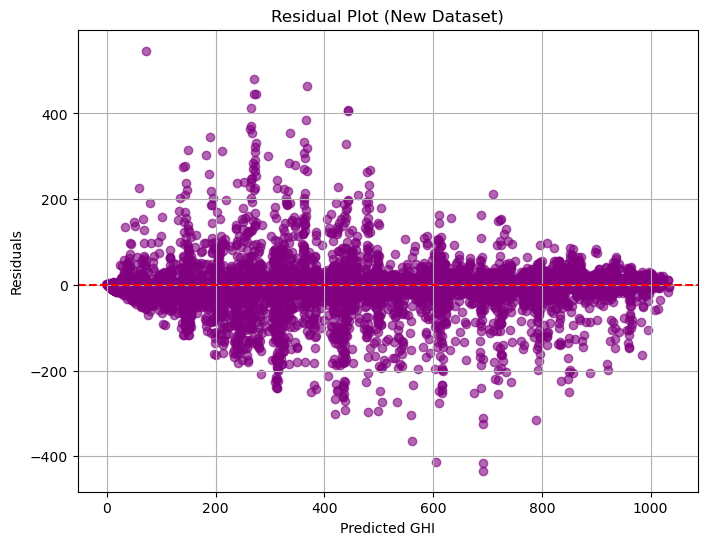

NameError: name 'y_combined_actual' is not defined

<Figure size 800x600 with 0 Axes>

In [60]:
#visulaize results from previous cell

import matplotlib.pyplot as plt

# Plot: Actual vs Predicted for the new dataset
plt.figure(figsize=(8, 6))
plt.scatter(y_new_actual, y_new_predicted, alpha=0.6, color='blue')
plt.plot([y_new_actual.min(), y_new_actual.max()], [y_new_actual.min(), y_new_actual.max()], '--r')
plt.xlabel("Actual GHI")
plt.ylabel("Predicted GHI")
plt.title("Actual vs Predicted GHI (New Dataset)")
plt.grid()
plt.show()

# Plot: Residuals for the new dataset
residuals_new = y_new_actual - y_new_predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_new_predicted, residuals_new, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted GHI")
plt.ylabel("Residuals")
plt.title("Residual Plot (New Dataset)")
plt.grid()
plt.show()

# Plot: Actual vs Predicted for the combined dataset
plt.figure(figsize=(8, 6))
plt.scatter(y_combined_actual, y_combined_predicted, alpha=0.6, color='green')
plt.plot([y_combined_actual.min(), y_combined_actual.max()], [y_combined_actual.min(), y_combined_actual.max()], '--r')
plt.xlabel("Actual GHI")
plt.ylabel("Predicted GHI")
plt.title("Actual vs Predicted GHI (Combined Dataset)")
plt.grid()
plt.show()

# Plot: Residuals for the combined dataset
residuals_combined = y_combined_actual - y_combined_predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_combined_predicted, residuals_combined, alpha=0.6, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted GHI")
plt.ylabel("Residuals")
plt.title("Residual Plot (Combined Dataset)")
plt.grid()
plt.show()

# Cross-validation scores plot for combined dataset
cv_scores = cross_val_score(
    stacking_regressor,
    X_combined,
    y_combined_actual,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring='r2'
)
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cv_scores) + 1), cv_scores, color='teal')
plt.axhline(cv_scores.mean(), color='red', linestyle='--', label=f"Mean R²: {cv_scores.mean():.3f}")
plt.xlabel("Fold")
plt.ylabel("R² Score")
plt.title("Cross-Validation R² Scores (Combined Dataset)")
plt.legend()
plt.grid()
plt.show()



In [44]:
la = pd.read_csv('LA.csv')
la

Year  Month  Day  Hour  Minute  Temperature  Alpha    AOD  Asymmetry  \
0     2022      1    1     0      30         11.1   1.06  0.078       0.64   
1     2022      1    1     1      30          9.7   1.05  0.077       0.64   
2     2022      1    1     2      30          8.9   1.11  0.075       0.64   
3     2022      1    1     3      30          8.1   1.21  0.068       0.64   
4     2022      1    1     4      30          7.4   1.29  0.061       0.64   
...    ...    ...  ...   ...     ...          ...    ...    ...        ...   
8755  2022     12   31    19      30         14.5   1.15  0.087       0.64   
8756  2022     12   31    20      30         14.4   1.12  0.077       0.64   
8757  2022     12   31    21      30         14.3   1.07  0.089       0.64   
8758  2022     12   31    22      30         14.1   1.05  0.073       0.64   
8759  2022     12   31    23      30         14.0   1.05  0.062       0.64   

      Clearsky DHI  ...  GHI  Ozone  Relative Humidity  Solar Zenith Angle  \
0               28  ...   44  0.277              84.66               86.26   
1                0  ...    0  0.279              89.43               97.54   
2                0  ...    0  0.282              91.81              109.28   
3                0  ...    0  0.285              91.72              121.44   
4                0  ...    0  0.287              89.89              133.82   
...            ...  ...  ...    ...                ...                 ...   
8755            90  ...  119  0.275              90.15               57.41   
8756            89  ...  117  0.277              91.08               57.63   
8757            85  ...   93  0.279              91.80               61.26   
8758            72  ...   78  0.281              92.69               67.74   
8759            55  ...   39  0.283              92.55               76.34   

       SSA  Surface Albedo  Pressure  Precipitable Water  Wind Direction  \
0     0.94            0.14       981                 1.1             277   
1     0.93            0.14       981                 1.0             296   
2     0.93            0.14       982                 0.9             319   
3     0.93            0.14       982                 0.7             339   
4     0.92            0.14       983                 0.6             351   
...    ...             ...       ...                 ...             ...   
8755  0.93            0.13       989                 2.2             192   
8756  0.94            0.13       988                 2.2             195   
8757  0.94            0.13       987                 2.2             198   
8758  0.94            0.13       987                 2.3             198   
8759  0.94            0.13       986                 2.2             198   

      Wind Speed  
0            2.4  
1            2.2  
2            2.4  
3            2.7  
4            2.7  
...          ...  
8755         4.0  
8756         4.3  
8757         4.5  
8758         4.6  
8759         4.6  

[8760 rows x 28 columns]

In [50]:
#Preprocess data for Los Angeles
import pandas as pd

# Load data
la = pd.read_csv('LA.csv')

# Drop all solar radiation indicators except GHI
features_to_drop = ['Year', 'Month', 'Day', 'Minute', 'Cloud Fill Flag', 'Fill Flag','Ozone','Asymmetry','Clearsky GHI', 'Clearsky DHI', 'Clearsky DNI', 'DHI', 'DNI',]

la = la.drop(columns=features_to_drop)



# Check dataset after modifications
print(la.head())

# Save the cleaned dataset 
la.to_csv('LA.csv', index=False)

   Hour  Temperature  Alpha    AOD  Cloud Type  Dew Point  GHI  \
0     0         11.1   1.06  0.078           0        8.6   44   
1     1          9.7   1.05  0.077           0        8.0    0   
2     2          8.9   1.11  0.075           0        7.6    0   
3     3          8.1   1.21  0.068           0        6.8    0   
4     4          7.4   1.29  0.061           0        5.8    0   

   Relative Humidity  Solar Zenith Angle   SSA  Surface Albedo  Pressure  \
0              84.66               86.26  0.94            0.14       981   
1              89.43               97.54  0.93            0.14       981   
2              91.81              109.28  0.93            0.14       982   
3              91.72              121.44  0.93            0.14       982   
4              89.89              133.82  0.92            0.14       983   

   Precipitable Water  Wind Direction  Wind Speed  
0                 1.1             277         2.4  
1                 1.0             296     

PermissionError: [Errno 13] Permission denied: 'LA.csv'

In [51]:
sand = pd.read_csv('SanDiego.csv')
sand

Year  Month  Day  Hour  Minute  Temperature  Alpha    AOD  Asymmetry  \
0     2022      1    1     0      30         13.5   0.78  0.107       0.64   
1     2022      1    1     1      30         13.2   0.70  0.110       0.64   
2     2022      1    1     2      30         13.0   0.60  0.104       0.64   
3     2022      1    1     3      30         12.9   0.59  0.113       0.64   
4     2022      1    1     4      30         13.0   0.56  0.112       0.64   
...    ...    ...  ...   ...     ...          ...    ...    ...        ...   
8755  2022     12   31    19      30         16.8   1.09  0.063       0.64   
8756  2022     12   31    20      30         16.5   1.06  0.061       0.64   
8757  2022     12   31    21      30         16.1   1.05  0.063       0.64   
8758  2022     12   31    22      30         15.8   1.05  0.058       0.64   
8759  2022     12   31    23      30         15.6   1.07  0.049       0.64   

      Clearsky DHI  ...  GHI  Ozone  Relative Humidity  Solar Zenith Angle  \
0               29  ...   35  0.287              82.83               86.35   
1                0  ...    0  0.288              82.23               97.87   
2                0  ...    0  0.288              81.36              109.80   
3                0  ...    0  0.288              80.64              122.14   
4                0  ...    0  0.288              79.66              134.71   
...            ...  ...  ...    ...                ...                 ...   
8755            85  ...  239  0.273              80.39               56.00   
8756            84  ...  184  0.274              82.16               56.49   
8757            79  ...  225  0.276              84.13               60.45   
8758            69  ...  129  0.279              85.25               67.28   
8759            53  ...   32  0.281              86.14               76.18   

       SSA  Surface Albedo  Pressure  Precipitable Water  Wind Direction  \
0     0.97            0.07      1007                 1.5             278   
1     0.97            0.07      1007                 1.4             276   
2     0.97            0.07      1008                 1.3             275   
3     0.97            0.07      1008                 1.2             272   
4     0.97            0.07      1009                 1.2             272   
...    ...             ...       ...                 ...             ...   
8755  0.95            0.08      1015                 2.1             204   
8756  0.95            0.08      1014                 2.1             200   
8757  0.94            0.08      1013                 2.1             196   
8758  0.94            0.08      1013                 2.1             194   
8759  0.94            0.08      1013                 2.1             193   

      Wind Speed  
0            5.8  
1            5.9  
2            5.9  
3            5.7  
4            5.4  
...          ...  
8755         3.7  
8756         4.1  
8757         4.3  
8758         4.4  
8759         4.4  

[8760 rows x 28 columns]

In [52]:
#Preprocess data for San Diego
import pandas as pd

# Load data
sand = pd.read_csv('SanDiego.csv')

# Drop all solar radiation indicators except GHI
features_to_drop = ['Year', 'Month', 'Day', 'Minute', 'Cloud Fill Flag', 'Fill Flag','Ozone','Asymmetry','Clearsky GHI', 'Clearsky DHI', 'Clearsky DNI', 'DHI', 'DNI',]

sand = sand.drop(columns=features_to_drop)



# Check dataset after modifications
print(sand.head())

# Save the cleaned dataset 
sand.to_csv('SanDiego.csv', index=False)

   Hour  Temperature  Alpha    AOD  Cloud Type  Dew Point  GHI  \
0     0         13.5   0.78  0.107           0       10.6   35   
1     1         13.2   0.70  0.110           2       10.2    0   
2     2         13.0   0.60  0.104           3        9.9    0   
3     3         12.9   0.59  0.113           3        9.7    0   
4     4         13.0   0.56  0.112           3        9.6    0   

   Relative Humidity  Solar Zenith Angle   SSA  Surface Albedo  Pressure  \
0              82.83               86.35  0.97            0.07      1007   
1              82.23               97.87  0.97            0.07      1007   
2              81.36              109.80  0.97            0.07      1008   
3              80.64              122.14  0.97            0.07      1008   
4              79.66              134.71  0.97            0.07      1009   

   Precipitable Water  Wind Direction  Wind Speed  
0                 1.5             278         5.8  
1                 1.4             276     

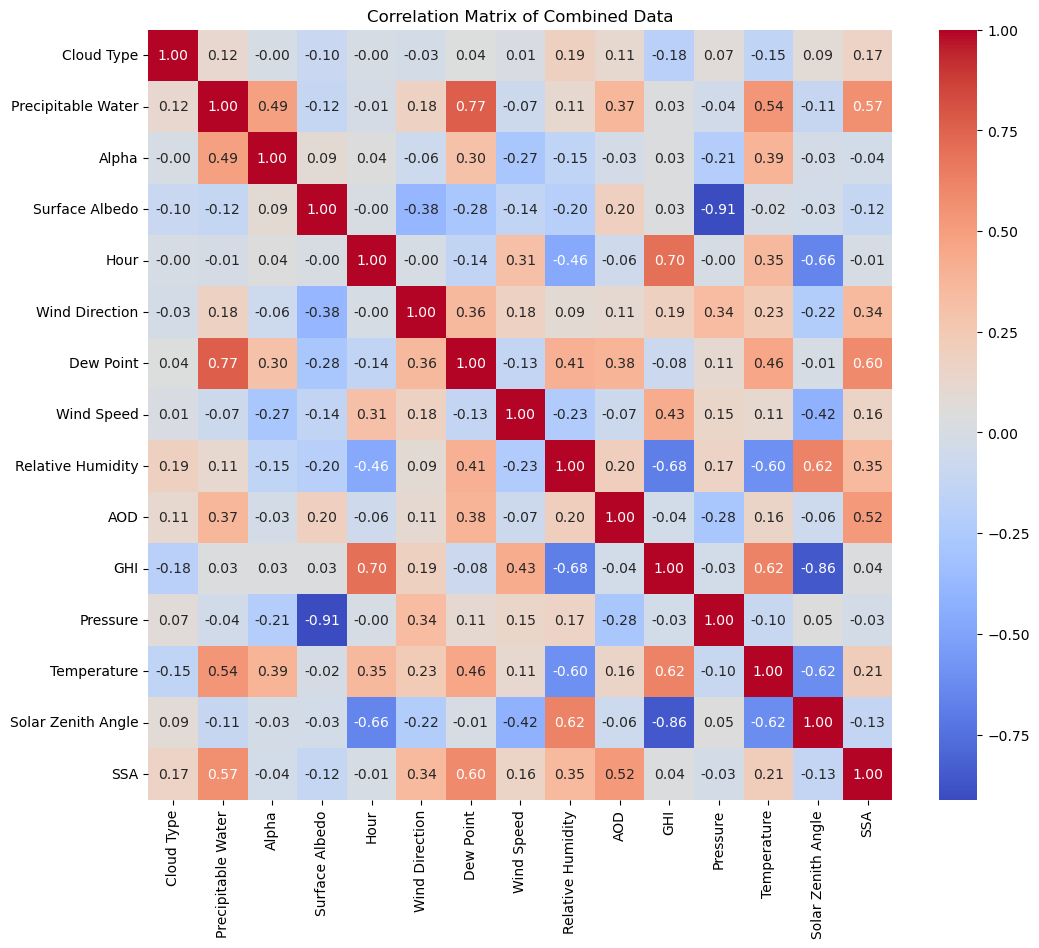

Stacking Regression Evaluation Metrics:
Mean Absolute Error (MAE): 17.950433
Root Mean Squared Error (RMSE): 43.384271
Actual R² Score: 0.981687
Predicted R² Score (Cross-Validation): 0.975362


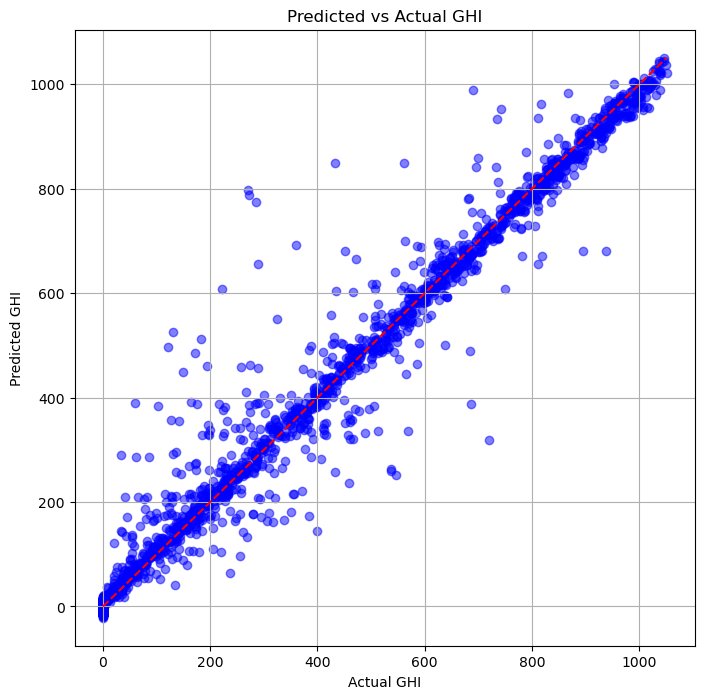

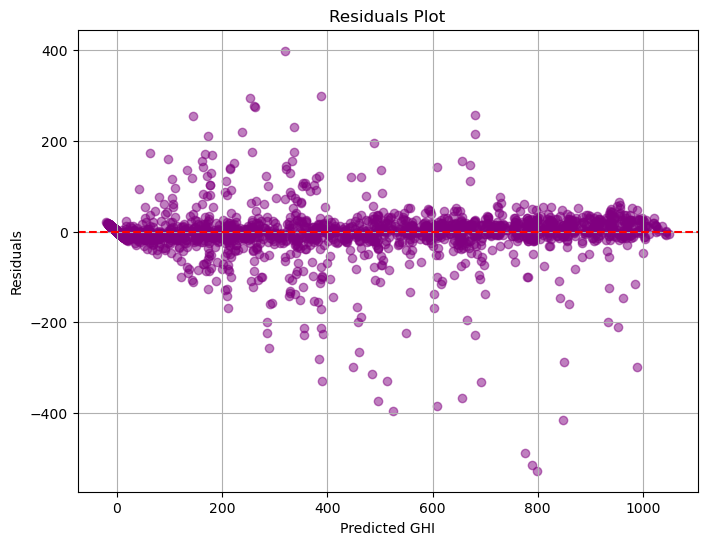

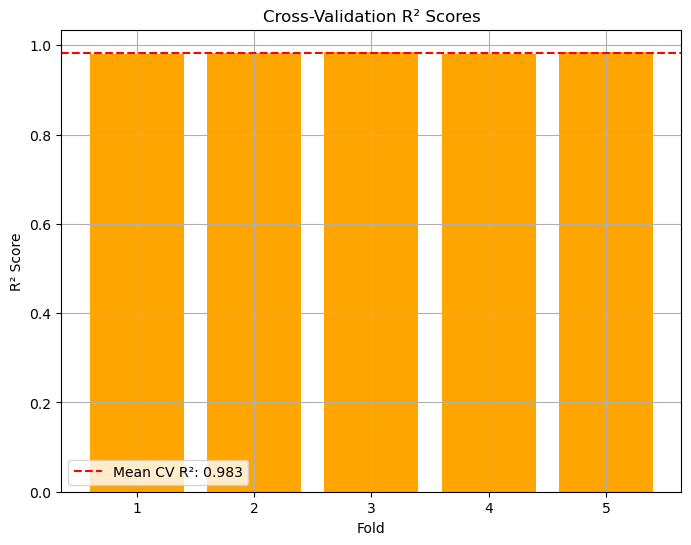


Equation of the Stacking Regressor (Final Estimator):
y = 0.067*lr + 0.937*dt + -0.340

Equation of the Base Linear Regression Model:
y = -9.962*Cloud Type + -25.494*Precipitable Water + 11.917*Alpha + 998.706*Surface Albedo + 10.422*Hour + 0.139*Wind Direction + -28.965*Dew Point + 23.073*Wind Speed + 5.451*Relative Humidity + -135.828*AOD + 2.672*Pressure + 36.416*Temperature + -3.563*Solar Zenith Angle + 629.533*SSA + -3681.532


In [64]:
#Combine data for Los Angeles and San Diego and create Stacking Regressor
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the LA and San Diego datasets
la_path = 'LA.csv'
san_diego_path = 'SanDiego.csv'

la_data = pd.read_csv(la_path)
san_diego_data = pd.read_csv(san_diego_path)

# Harmonize columns by selecting the common subset
common_columns = list(set(la_data.columns) & set(san_diego_data.columns))
la_data = la_data[common_columns]
san_diego_data = san_diego_data[common_columns]

# Combine the datasets
combined_data = pd.concat([la_data, san_diego_data], ignore_index=True)

# Display correlation matrix
correlation_matrix = combined_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Combined Data")
plt.show()

# Prepare features (X) and target (y)
X = combined_data.drop(columns=['GHI'])  # Features
y = combined_data['GHI']  # Target variable

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
linear_regressor = LinearRegression()
decision_tree_regressor = DecisionTreeRegressor(max_depth=10, random_state=42)

# Define stacking regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('lr', linear_regressor),
        ('dt', decision_tree_regressor)
    ],
    final_estimator=LinearRegression()
)

# Train stacking regressor
stacking_regressor.fit(X_train, y_train)

# Make predictions
y_stack_pred = stacking_regressor.predict(X_test)

# Evaluate actual R²
actual_r2 = r2_score(y_test, y_stack_pred)

# Evaluate predicted R² using cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
predicted_r2 = cross_val_score(stacking_regressor, X_test, y_test, cv=kf, scoring='r2').mean()

# Calculate other metrics
stack_mae = mean_absolute_error(y_test, y_stack_pred)
stack_rmse = mean_squared_error(y_test, y_stack_pred, squared=False)

# Print evaluation metrics
print("Stacking Regression Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {stack_mae:.6f}")
print(f"Root Mean Squared Error (RMSE): {stack_rmse:.6f}")
print(f"Actual R² Score: {actual_r2:.6f}")
print(f"Predicted R² Score (Cross-Validation): {predicted_r2:.6f}")

# Plot Predicted vs Actual values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_stack_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual GHI")
plt.ylabel("Predicted GHI")
plt.title("Predicted vs Actual GHI")
plt.grid()
plt.show()

# Plot residuals
residuals = y_test - y_stack_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_stack_pred, residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted GHI")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.grid()
plt.show()

# Feature Importance from Decision Tree (as one of the base models)
if hasattr(decision_tree_regressor, "feature_importances_"):
    importance = decision_tree_regressor.feature_importances_
    feature_names = X.columns
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, importance, color='teal')
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance from Decision Tree Regressor")
    plt.grid(axis='x')
    plt.show()

# Cross-validation scores visualization
cv_scores = cross_val_score(stacking_regressor, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='r2')
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cv_scores) + 1), cv_scores, color='orange')
plt.axhline(cv_scores.mean(), color='red', linestyle='--', label=f"Mean CV R²: {cv_scores.mean():.3f}")
plt.xlabel("Fold")
plt.ylabel("R² Score")
plt.title("Cross-Validation R² Scores")
plt.legend()
plt.grid()
plt.show()

# Function to display Linear Regression Equation
def display_linear_regression_equation(model, feature_names):
    coefficients = model.coef_
    intercept = model.intercept_
    equation = "y = " + " + ".join([f"{coef:.3f}*{name}" for coef, name in zip(coefficients, feature_names)])
    equation += f" + {intercept:.3f}"
    return equation

# Final estimator equation (Stacking Regressor's meta-model)
final_estimator = stacking_regressor.final_estimator_
stacking_equation = display_linear_regression_equation(final_estimator, ['lr', 'dt'])
print("\nEquation of the Stacking Regressor (Final Estimator):")
print(stacking_equation)

# Base Linear Regression equation
linear_regressor.fit(X_train, y_train)  # Ensure it's trained independently
linear_regression_equation = display_linear_regression_equation(linear_regressor, X.columns)
print("\nEquation of the Base Linear Regression Model:")
print(linear_regression_equation)


In [70]:
#Test the model from the previous cell on simplified San Fransisco data from 2022

# Import necessary libraries
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the new dataset
new_dataset_path = 'simplified_GHI_dataset4.csv'  # Replace with your file path
new_data = pd.read_csv(new_dataset_path)

# Ensure the feature names match those used during training
X_new = new_data[X_train.columns]  # Align with the training feature columns

# Predict GHI using the stacking regressor
new_data['Predicted_GHI'] = stacking_regressor.predict(X_new)

# Evaluation metrics for the new dataset
y_new_actual = new_data['GHI']  # Actual GHI values from the new dataset
y_new_predicted = new_data['Predicted_GHI']  # Predicted GHI values

new_mae = mean_absolute_error(y_new_actual, y_new_predicted)
new_rmse = mean_squared_error(y_new_actual, y_new_predicted, squared=False)
new_r2_actual = r2_score(y_new_actual, y_new_predicted)

print("\nEvaluation Metrics for the New Dataset (simplified_GHI_dataset4.csv):")
print(f"Mean Absolute Error (MAE): {new_mae:.6f}")
print(f"Root Mean Squared Error (RMSE): {new_rmse:.6f}")
print(f"Actual R² Score: {new_r2_actual:.6f}")

# Display the updated dataset with Actual_GHI and Predicted_GHI
new_data_with_predictions = new_data[['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Predicted_GHI']]
new_data_with_predictions.rename(columns={'GHI': 'Actual_GHI'}, inplace=True)

# Display predictions for the new dataset
print("\nActual vs Predicted GHI for the New Dataset:")
print(new_data_with_predictions.head(20))  # Display the first 20 rows

# Save the predictions to a new CSV file
output_path = '/mnt/data/simplified_GHI_dataset4_with_predictions.csv'
new_data_with_predictions.to_csv(output_path, index=False)
print(f"\nPredictions saved to: {output_path}")




Evaluation Metrics for the New Dataset (simplified_GHI_dataset4.csv):
Mean Absolute Error (MAE): 39.528424
Root Mean Squared Error (RMSE): 74.515617
Actual R² Score: 0.937935

Actual vs Predicted GHI for the New Dataset:
    Year  Month  Day  Hour  Minute  Actual_GHI  Predicted_GHI
0   2022      2    8    15       0           1      14.303279
1   2022      2    9    15       0           1      16.645878
2   2022      2   12    15       0           1      17.207575
3   2022      2   21     2       0           1       7.232102
4   2022      2   23     2       0           1       3.842508
5   2022      3    4    14      30           1      13.944957
6   2022      3    5    14      30           1      19.038261
7   2022      3   24    14       0           1      18.010817
8   2022      3   25    14       0           1      15.813366
9   2022      4   13    13      30           1       9.831858
10  2022      4   24     3       0           1      10.564159
11  2022      4   25     3       0

C:\Users\jchun\AppData\Local\Temp\ipykernel_17324\239794717.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_with_predictions.rename(columns={'GHI': 'Actual_GHI'}, inplace=True)


OSError: Cannot save file into a non-existent directory: '\mnt\data'

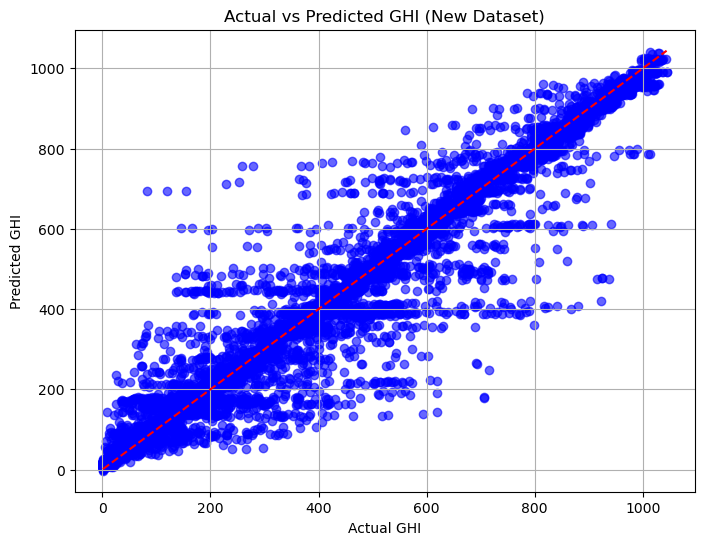

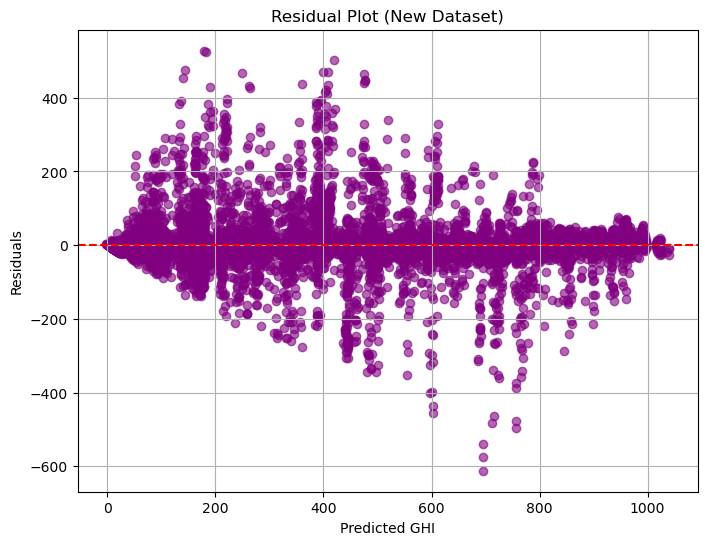

NameError: name 'y_combined_actual' is not defined

<Figure size 800x600 with 0 Axes>

In [71]:
#Visualize results
import matplotlib.pyplot as plt

# Plot: Actual vs Predicted for the new dataset
plt.figure(figsize=(8, 6))
plt.scatter(y_new_actual, y_new_predicted, alpha=0.6, color='blue')
plt.plot([y_new_actual.min(), y_new_actual.max()], [y_new_actual.min(), y_new_actual.max()], '--r')
plt.xlabel("Actual GHI")
plt.ylabel("Predicted GHI")
plt.title("Actual vs Predicted GHI (New Dataset)")
plt.grid()
plt.show()

# Plot: Residuals for the new dataset
residuals_new = y_new_actual - y_new_predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_new_predicted, residuals_new, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted GHI")
plt.ylabel("Residuals")
plt.title("Residual Plot (New Dataset)")
plt.grid()
plt.show()

# Plot: Actual vs Predicted for the combined dataset
plt.figure(figsize=(8, 6))
plt.scatter(y_combined_actual, y_combined_predicted, alpha=0.6, color='green')
plt.plot([y_combined_actual.min(), y_combined_actual.max()], [y_combined_actual.min(), y_combined_actual.max()], '--r')
plt.xlabel("Actual GHI")
plt.ylabel("Predicted GHI")
plt.title("Actual vs Predicted GHI (Combined Dataset)")
plt.grid()
plt.show()

# Plot: Residuals for the combined dataset
residuals_combined = y_combined_actual - y_combined_predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_combined_predicted, residuals_combined, alpha=0.6, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted GHI")
plt.ylabel("Residuals")
plt.title("Residual Plot (Combined Dataset)")
plt.grid()
plt.show()

# Cross-validation scores plot for combined dataset
cv_scores = cross_val_score(
    stacking_regressor,
    X_combined,
    y_combined_actual,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring='r2'
)
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cv_scores) + 1), cv_scores, color='teal')
plt.axhline(cv_scores.mean(), color='red', linestyle='--', label=f"Mean R²: {cv_scores.mean():.3f}")
plt.xlabel("Fold")
plt.ylabel("R² Score")
plt.title("Cross-Validation R² Scores (Combined Dataset)")
plt.legend()
plt.grid()
plt.show()

